# Top 300 YouTube Channels

This project uses a dataset from Kaggle (https://www.kaggle.com/datasets/iabdulw/top-300-youtube-channels) to explore insights and relationships between the Top 300 YouTube Channels' video views, video count, subscriber count, genre, and the year the channel started.

---

## 1) Import the packages

In [1]:
#Import packages

import pandas as pd
import numpy as np
import os
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

---

## 2) Load the data

In [2]:
#Load data file

yt = pd.read_csv('Top300YoutubeChannels.csv')
yt

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,0,1,T-Series,237000000,216495600668,18831,Music,2006
1,1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015
...,...,...,...,...,...,...,...,...
291,295,296,Jake Fellman,15000000,11618626248,440,Entertainment,2012
292,296,297,DisneyJuniorUK,11300000,11586962179,2789,Entertainment,2010
293,297,298,JTBC Entertainment,7580000,11512332695,76838,Entertainment,2012
294,298,299,Mnet TV,9040000,11442069884,21617,Entertainment,2013


We can see there are 8 columns (not including the index column).

---

## 3) Explore the dataset's structure

In this section we will look at the dataset's information including the number of rows it has, its columns and data types, and check for any missing data.

We will confirm the number of rows the dataset has.

In [3]:
#Confirm the dataset's total number of rows

len(yt)

296

The dataset's length of 296 is of note as the amount of channels is not exactly 300.

We will confirm that there are no duplicate channels by confirming that the number of unique channel names is also 296.

In [4]:
#Confirm the number of unique channels is 296.

len(yt.Channel_Name.unique())

296

The number of unique channel names is 296, which matches the number of rows within the dataset. We can confirm that there are no duplicate channels within this dataset.

In [5]:
#Confirm the dataset's data type info

yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        296 non-null    int64 
 1   Rank              296 non-null    int64 
 2   Channel_Name      296 non-null    object
 3   Subscriber_Count  296 non-null    int64 
 4   Video_Views       296 non-null    int64 
 5   Video_Count       296 non-null    int64 
 6   Genre             296 non-null    object
 7   Channel_Started   296 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 18.6+ KB


We can see what the different column names are and the type of data within each in the above table.

We will also confirm if there are any null values within the dataset.

In [6]:
#Confirm if there are any null values within the dataset

yt.isnull().sum()

Unnamed: 0          0
Rank                0
Channel_Name        0
Subscriber_Count    0
Video_Views         0
Video_Count         0
Genre               0
Channel_Started     0
dtype: int64

We can confirm that there are no null values within this dataset.

---

## 4) Clean the dataset

In this section, we will clean up the dataset accordingly for analysis.

We do not need the "Unnamed: 0" column as it does not provide any useful information. It will be dropped, leaving us with 7 total columns (not including the index column).

In [7]:
#Drop the unnecessary column "Unnamed: 0" within the dataset.

yt1 = yt.drop(['Unnamed: 0'], axis = 1)
yt1

,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,237000000,216495600668,18831,Music,2006
1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015
...,...,...,...,...,...,...,...
291,296,Jake Fellman,15000000,11618626248,440,Entertainment,2012
292,297,DisneyJuniorUK,11300000,11586962179,2789,Entertainment,2010
293,298,JTBC Entertainment,7580000,11512332695,76838,Entertainment,2012
294,299,Mnet TV,9040000,11442069884,21617,Entertainment,2013


Since it was noted earlier that the length of the dataset is 296 as opposed to 300, we will confirm that there are 4 missing values within the "Rank" column.

In [8]:
#Confirm that there are missing values within the Rank column as there are only 296 rows.

yt1.Rank.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

The above set is missing Ranks 37, 97, 137, and 254.

We will create a corrected "Rank" column title "Fixed_Rank" and drop the incorrect "Rank" column.

We can create a corrected "Rank" column by using a loop to create a list from 1 to 296.

In [9]:
#Create a corrected Fixed Rank column

#Code to create a list from 1 to 296 (this will be the "Fixed_Rank" column)

fixedranklist = [] 

for i in range(296):
    fixedranklist.append(i+1)
    
fixedranklist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

The list we created above can then be inserted into the dataset.

In [10]:
#Insert the "Fixed_Rank" column

yt1.insert(loc = 1,
           column = 'Fixed_Rank',
           value = fixedranklist)

yt1

,Rank,Fixed_Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,1,T-Series,237000000,216495600668,18831,Music,2006
1,2,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,3,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,4,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,5,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015
...,...,...,...,...,...,...,...,...
291,296,292,Jake Fellman,15000000,11618626248,440,Entertainment,2012
292,297,293,DisneyJuniorUK,11300000,11586962179,2789,Entertainment,2010
293,298,294,JTBC Entertainment,7580000,11512332695,76838,Entertainment,2012
294,299,295,Mnet TV,9040000,11442069884,21617,Entertainment,2013


We can then drop the initial "Rank" column.

In [11]:
#Drop the incorrect "Rank" column

yt2 = yt1.drop(['Rank'], axis = 1)
yt2

,Fixed_Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,237000000,216495600668,18831,Music,2006
1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015
...,...,...,...,...,...,...,...
291,292,Jake Fellman,15000000,11618626248,440,Entertainment,2012
292,293,DisneyJuniorUK,11300000,11586962179,2789,Entertainment,2010
293,294,JTBC Entertainment,7580000,11512332695,76838,Entertainment,2012
294,295,Mnet TV,9040000,11442069884,21617,Entertainment,2013


The dataset has been cleaned, and we will assign a new name to this cleaned dataset, "ytclean", which we will use for the duration of the analyses.

In [12]:
#Update the naming of the cleaned yt dataset to "ytclean"

ytclean = yt2
ytclean

,Fixed_Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,237000000,216495600668,18831,Music,2006
1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015
...,...,...,...,...,...,...,...
291,292,Jake Fellman,15000000,11618626248,440,Entertainment,2012
292,293,DisneyJuniorUK,11300000,11586962179,2789,Entertainment,2010
293,294,JTBC Entertainment,7580000,11512332695,76838,Entertainment,2012
294,295,Mnet TV,9040000,11442069884,21617,Entertainment,2013


---

## 5) Explore the data

In this section we will explore the data itself and highlight any statistical measures of note.

We will take a look at the dataset's statistical summary of its numerical values.

In [13]:
#Dataset's Statistical Summary

ytclean.describe()

,Fixed_Rank,Subscriber_Count,Video_Views,Video_Count,Channel_Started
count,296.000000,2.960000e+02,2.960000e+02,296.000000,296.000000
mean,148.500000,3.159155e+07,2.199628e+10,19174.331081,2011.368243
std,85.592056,2.471406e+07,1.942543e+10,46072.700205,3.997822
min,1.000000,3.720000e+06,1.138766e+10,15.000000,2005.000000
25%,74.750000,1.737500e+07,1.357843e+10,386.250000,2008.000000
50%,148.500000,2.570000e+07,1.633676e+10,1984.500000,2011.000000
75%,222.250000,3.675000e+07,2.284494e+10,8558.000000,2014.000000
max,296.000000,2.370000e+08,2.164956e+11,345736.000000,2021.000000


We are able to confirm that there are 296 entries in the dataset based on the "Fixed_Rank" count.

Another notable observation from the statistical summary include averages for Subscriber Count (31.6 million), Video Views (22.0 billion), and Video Count (46,072).

We can also take a look at the different channel names of the top 300 (296) YouTube channels.

In [14]:
#Channel Name column's unique values

ChannelNameSorted = sorted(ytclean.Channel_Name.unique())
ChannelNameSorted

['1theK (원더케이)',
 '5-Minute Crafts',
 '7clouds',
 'A.O.D',
 'A4',
 'ABC News',
 'ABP NEWS',
 'ABS-CBN Entertainment',
 'AMARINTV : อมรินทร์ทีวี',
 'ARY Digital HD',
 'Aaj Tak',
 'Adele',
 'AdeleVEVO',
 'Aditya Music',
 'Alan Chikin Chow',
 'Alan Walker',
 'And TV',
 'Anuel AA',
 'Aphmau',
 'Ariana Grande',
 'ArianaGrandeVevo',
 'As/Is',
 'Asianet',
 'Atlantic Records',
 'BANGTANTV',
 'BLACKPINK',
 'BabyBus - Canciones Infantiles & Videos para Niños',
 'BabyBus - Kids Songs and Cartoons',
 'Bad Bunny',
 'Badabun',
 'Beam Copphone',
 'Beyoncé',
 'BeyoncéVEVO',
 'Billie Eilish',
 'Blippi - Educational Videos for Kids',
 'Bollywood Classics',
 'Boram Tube Vlog [보람튜브 브이로그]',
 'Bounce Patrol - Kids Songs',
 'Bruno Mars',
 'BuzzFeedVideo',
 'CKN',
 'CNN',
 'CVS 3D Rhymes & Kids Songs',
 'Calvin Harris',
 'CalvinHarrisVEVO',
 'Canal KondZilla',
 'Ch3Thailand',
 'ChainsmokersVEVO',
 'Chris Brown',
 'ChrisBrownVEVO',
 'ChuChu TV Nursery Rhymes & Kids Songs',
 'Cocomelon - Nursery Rhymes',
 'Cold

Let's explore the unique kinds of genre that the channels fall under.

In [15]:
#Genre column's unique values

GenreSorted = sorted(ytclean.Genre.unique())
GenreSorted

['Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Music',
 'News & Politics',
 'People & Blogs',
 'Pets & Animals',
 'Sports']

Let's also explore the unique values of the years that the channels were started.

In [16]:
#Channel Started column's unique values

ChannelStarted = sorted(ytclean.Channel_Started.unique())
ChannelStarted

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

YouTube was started in 2005.

Which channel has the most video views in total?

In [17]:
#Channel with the most views

print(ytclean[ytclean.Video_Views == ytclean.Video_Views.max()])

   Fixed_Rank Channel_Name  Subscriber_Count   Video_Views  Video_Count  \
0           1     T-Series         237000000  216495600668        18831   

   Genre  Channel_Started  
0  Music             2006  


The T-Series channel has the most total video views with about 216.5 billion.

Which channel has the least video views in total?

In [18]:
#Channel with the least views

print(ytclean[ytclean.Video_Views == ytclean.Video_Views.min()])

     Fixed_Rank Channel_Name  Subscriber_Count  Video_Views  Video_Count  \
295         296     GMA News          12900000  11387663843       345736   

               Genre  Channel_Started  
295  News & Politics             2007  


The GMA News channel has the least total video views with about 11.4 billion.

Which channel has the most amount of videos?

In [19]:
#Channel with the most videos

print(ytclean[ytclean.Video_Count == ytclean.Video_Count.max()])

     Fixed_Rank Channel_Name  Subscriber_Count  Video_Views  Video_Count  \
295         296     GMA News          12900000  11387663843       345736   

               Genre  Channel_Started  
295  News & Politics             2007  


The GMA News channel has the most amount of videos with 345,736. It is of note that this channel also has the least amount of total video views within the dataset.

Which channel has the least amount of videos?

In [20]:
#Channel with the least videos

print(ytclean[ytclean.Video_Count == ytclean.Video_Count.min()])

     Fixed_Rank     Channel_Name  Subscriber_Count  Video_Views  Video_Count  \
218         219  Michael Jackson          27300000  13660689522           15   
223         224            Adele          29600000  13537940105           15   

     Genre  Channel_Started  
218  Music             2005  
223  Music             2008  


There are 2 channels tied for the least amount of total videos: "Michael Jackson" and "Adele". Both have a video count of 15 and are ranked 218 and 223 (in total video views) respectively. While these 2 channels have the least amount of videos, they do not have the least amount of video views based on rankings.

Which channel has the most amount of subscribers?

In [21]:
#Channel with the most subscribers

print(ytclean[ytclean.Subscriber_Count == ytclean.Subscriber_Count.max()])

   Fixed_Rank Channel_Name  Subscriber_Count   Video_Views  Video_Count  \
0           1     T-Series         237000000  216495600668        18831   

   Genre  Channel_Started  
0  Music             2006  


The T-Series channel has the most subscribers with 237 million. It is also ranked #1 based on video views.

Which channel has the least amount of subscribers?

In [22]:
#Channel with the least subscribers

print(ytclean[ytclean.Subscriber_Count == ytclean.Subscriber_Count.min()])

     Fixed_Rank Channel_Name  Subscriber_Count  Video_Views  Video_Count  \
226         227   KarolGVEVO           3720000  13512082882           66   

     Genre  Channel_Started  
226  Music             2016  


The KarolGVevo channel has the least subscribers with 3.7 million. However, this channel is not ranked last in terms of video views.

---

## 6) Single Variable Data Visualizations

The following graphs and analyses highlight 5 of the dataset's key variables:

 - Genre of the channel
 - Year the channel was started
 - Total video views of the channel
 - Total video count of the channel
 - Total subscriber count of the channel

#### We will use a bar plot to visualize the number of channels that fall within each specific genre.

In [23]:
#Genre Channel Count

ytclean['Genre'].value_counts()

Music               113
Entertainment        72
People & Blogs       27
Film & Animation     24
Gaming               18
Education            14
Comedy               11
News & Politics      11
Sports                4
Howto & Style         1
Pets & Animals        1
Name: Genre, dtype: int64

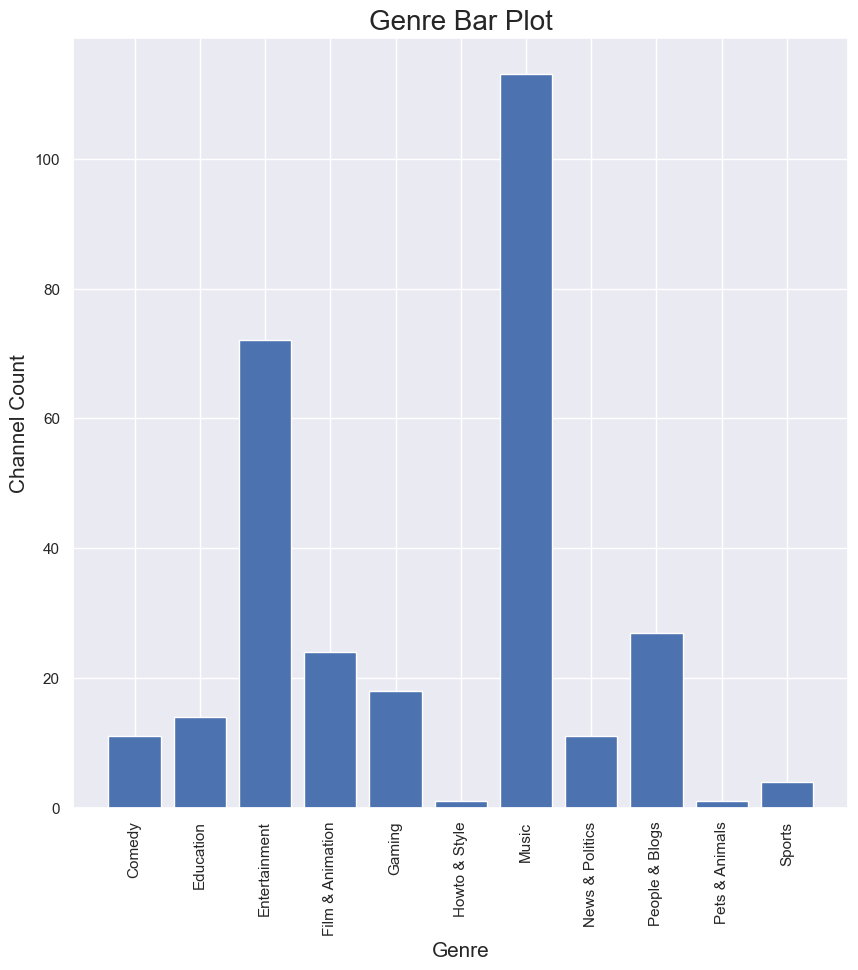

In [24]:
#Genre Bar Plot

GenreList = list(sorted(ytclean['Genre'].unique()))
GenreCountList = list(ytclean['Genre'].value_counts().sort_index())

plt.figure(figsize = (10,10))
plt.bar(GenreList, GenreCountList)
plt.title('Genre Bar Plot', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Channel Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

The top 3 genres with the most channels within YouTube's Top 300 (296) are Music, Entertainment, and People & Blogs.

#### We will also use a bar plot to visualize the number of channels started within each particular year.

In [25]:
#Year Started Channel Count

ytclean['Channel_Started'].value_counts()

2006    32
2014    31
2012    31
2009    30
2011    23
2013    23
2007    21
2008    18
2016    18
2015    17
2010    16
2005    10
2021     8
2018     7
2020     6
2017     4
2019     1
Name: Channel_Started, dtype: int64

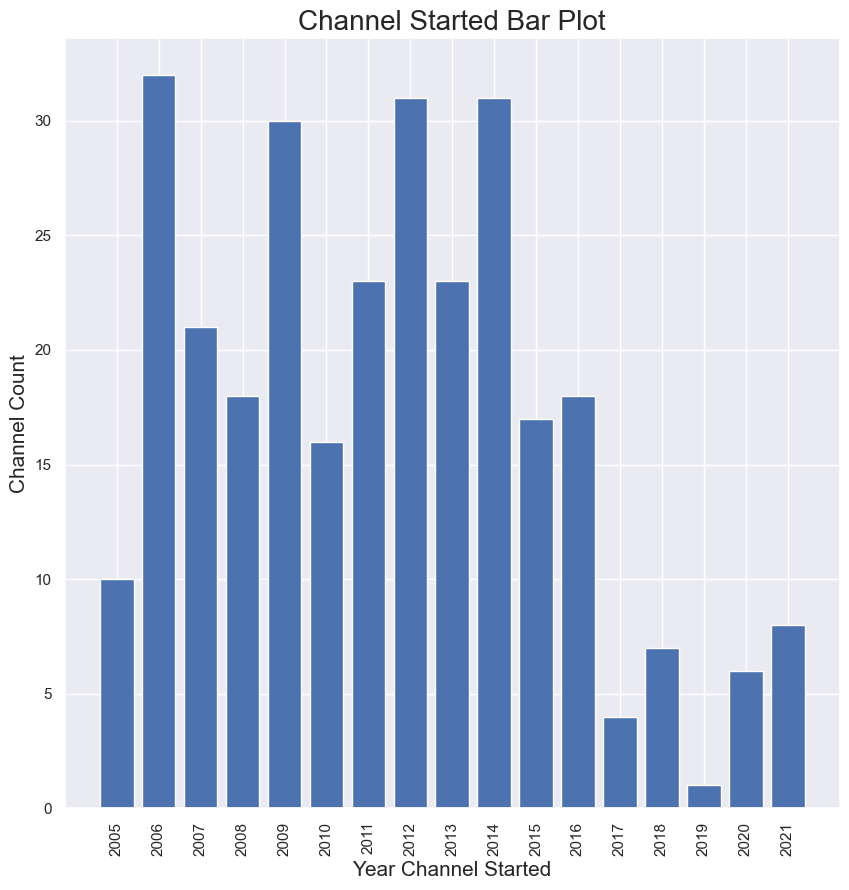

In [26]:
#Channel Started Bar Plot

ChannelStartedList = list(sorted(ytclean['Channel_Started'].unique()))
ChannelStartedCountList = list(ytclean['Channel_Started'].value_counts().sort_index())

plt.figure(figsize = (10,10))
plt.bar(ChannelStartedList, ChannelStartedCountList)
plt.title('Channel Started Bar Plot', fontsize = 20)
plt.xlabel('Year Channel Started', fontsize = 15)
plt.ylabel('Channel Count', fontsize = 15)
plt.xticks(sorted(ytclean['Channel_Started'].unique()), rotation = 90)
plt.show()

The top 3 years with the most channels created within YouTube's Top 300 (296) are 2006, 2012, and 2014 (2009 was also a notable year).

#### We will use a distribution plot to visualize how the video views per channel is distributed.

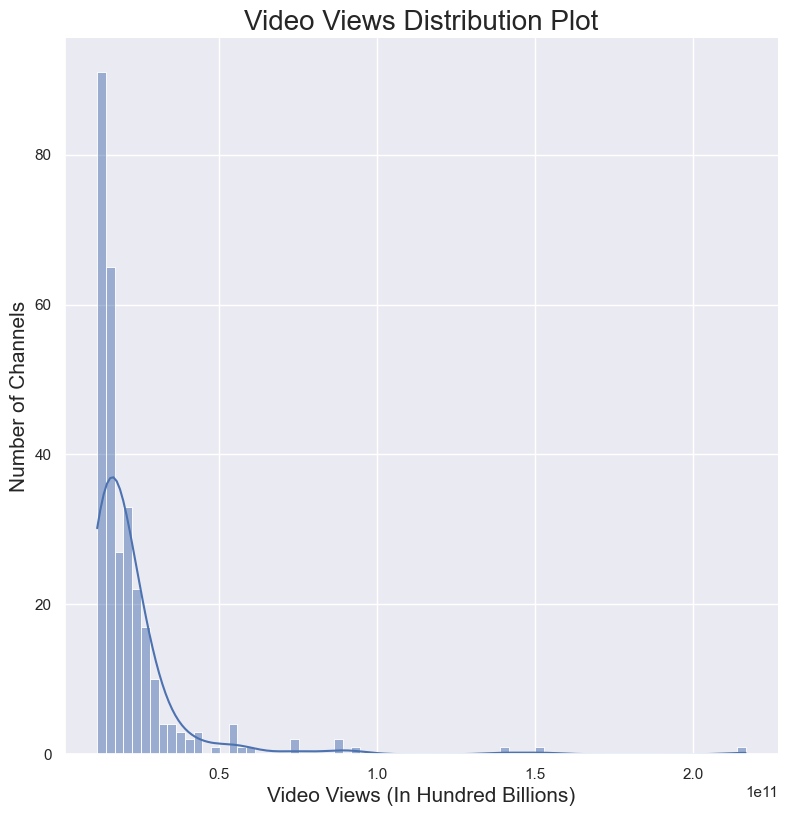

In [27]:
#Video Views Distribution Plot

sns.displot(ytclean.Video_Views, height = 8, kde = True)
plt.title('Video Views Distribution Plot', fontsize = 20)
plt.xlabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.ylabel('Number of Channels', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The distribution is right-skewed and most channels' total video views are under 50 billion.

#### We will use a distribution plot to visualize how the video count per channel is distributed.

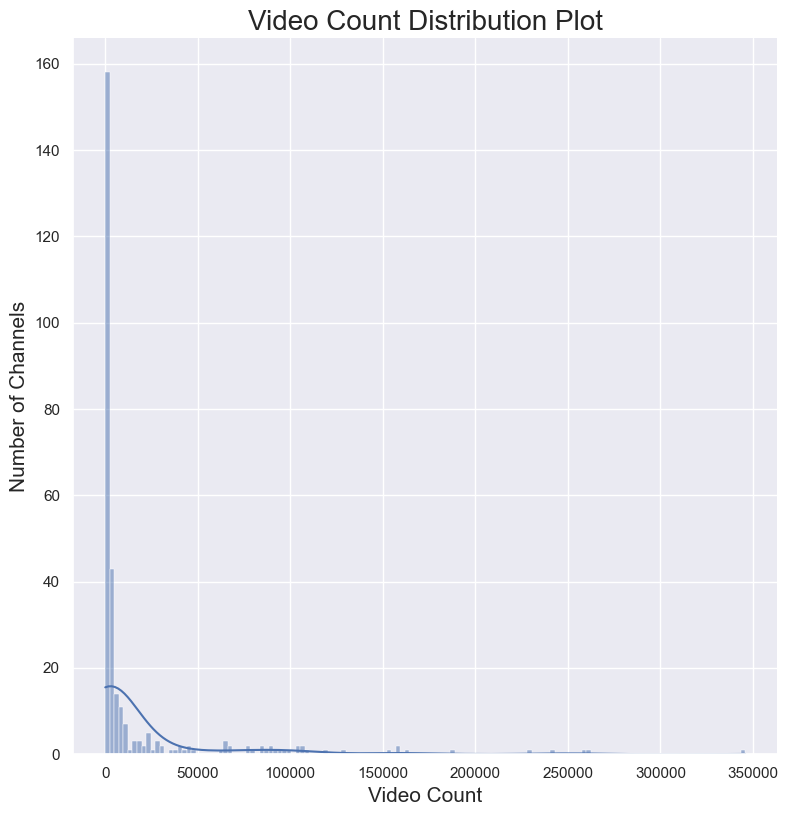

In [28]:
#Video Count Distribution Plot

sns.displot(ytclean.Video_Count, height = 8, kde = True)
plt.title('Video Count Distribution Plot', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Number of Channels', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The distribution is right-skewed and most channels' total video counts are under 50k.

#### We will use a distribution plot to visualize how the subscriber count per channel is distributed.

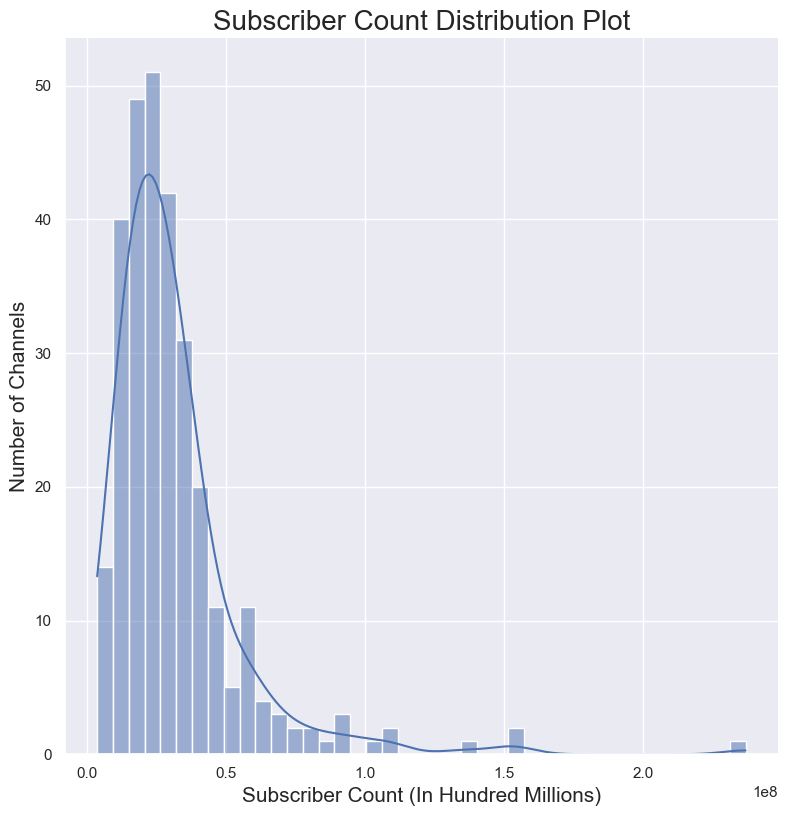

In [29]:
#Subscriber Count Distribution Plot

sns.displot(ytclean.Subscriber_Count, height = 8, kde = True)
plt.title('Subscriber Count Distribution Plot', fontsize = 20)
plt.xlabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.ylabel('Number of Channels', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The distribution is right-skewed and most channels' total subscriber counts are under 50 million.

---

## 7) Channel Metrics vs Genre Bar Plots

In this section, we will explore the 3 channel metrics (Video Views, Video Count, and Subscriber Count) against the different genres using bar plots as visualizations.

#### The first step is to create the bar plots is to sort the data set by Genre.

In [30]:
#Sort dataset by Genre

YTSortedByGenre = ytclean.sort_values('Genre', ascending=True)
YTSortedByGenre

,Fixed_Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
182,183,MoniLina,10900000,14960422456,746,Comedy,2021
215,216,Shorts Break,19900000,13780532791,371,Comedy,2021
277,278,Topper Guild,14000000,11997319531,644,Comedy,2014
278,279,東海オンエア,6830000,11958012432,2657,Comedy,2013
30,31,LankyBox,23300000,31155421572,7307,Comedy,2016
...,...,...,...,...,...,...,...
145,146,That Little Puff,18900000,16582763026,672,Pets & Animals,2020
288,289,NBA,19900000,11761981184,45177,Sports,2005
245,246,SportsNation,9520000,12981801302,3337,Sports,2009
6,7,WWE,93500000,74447865775,66901,Sports,2007


We will then create a data frame to use as a data source for pivot tables, which will help aggregate the channel metrics as sums against each unique genre.

In [31]:
#Create Genre Pivot Table Source Data Frame

GenrePivotSource = pd.DataFrame({'Genre': list(YTSortedByGenre['Genre']), 
                                 'Subscriber_Count': list(YTSortedByGenre['Subscriber_Count']),
                                 'Video_Views': list(YTSortedByGenre['Video_Views']),
                                 'Video_Count': list(YTSortedByGenre['Video_Count'])})

GenrePivotSource

,Genre,Subscriber_Count,Video_Views,Video_Count
0,Comedy,10900000,14960422456,746
1,Comedy,19900000,13780532791,371
2,Comedy,14000000,11997319531,644
3,Comedy,6830000,11958012432,2657
4,Comedy,23300000,31155421572,7307
...,...,...,...,...
291,Pets & Animals,18900000,16582763026,672
292,Sports,19900000,11761981184,45177
293,Sports,9520000,12981801302,3337
294,Sports,93500000,74447865775,66901


First, we will explore the total amount of video views for each genre.

We will use the pivot table function to aggregate video views for each genre.

In [32]:
#Create Video Views vs Genre Pivot Table

VideoViewsGenrePivot = pd.pivot_table(GenrePivotSource, values='Video_Views', index='Genre', aggfunc='sum')
print(VideoViewsGenrePivot)

                    Video_Views
Genre                          
Comedy             183583656216
Education          488360795776
Entertainment     1413577129943
Film & Animation   730538279845
Gaming             308455890573
Howto & Style       25251693106
Music             2424786010175
News & Politics    166941819185
People & Blogs     638081119552
Pets & Animals      16582763026
Sports             114738579212


Next, we will sort by values in descending order.

In [33]:
#Video Views vs Genre Pivot Table Sorted by Video Views

VideoViewsGenrePivot.sort_values(by = 'Video_Views', ascending = False)

,Video_Views
Genre,
Music,2424786010175
Entertainment,1413577129943
Film & Animation,730538279845
People & Blogs,638081119552
Education,488360795776
Gaming,308455890573
Comedy,183583656216
News & Politics,166941819185
Sports,114738579212


We will then plot the results as a bar plot.

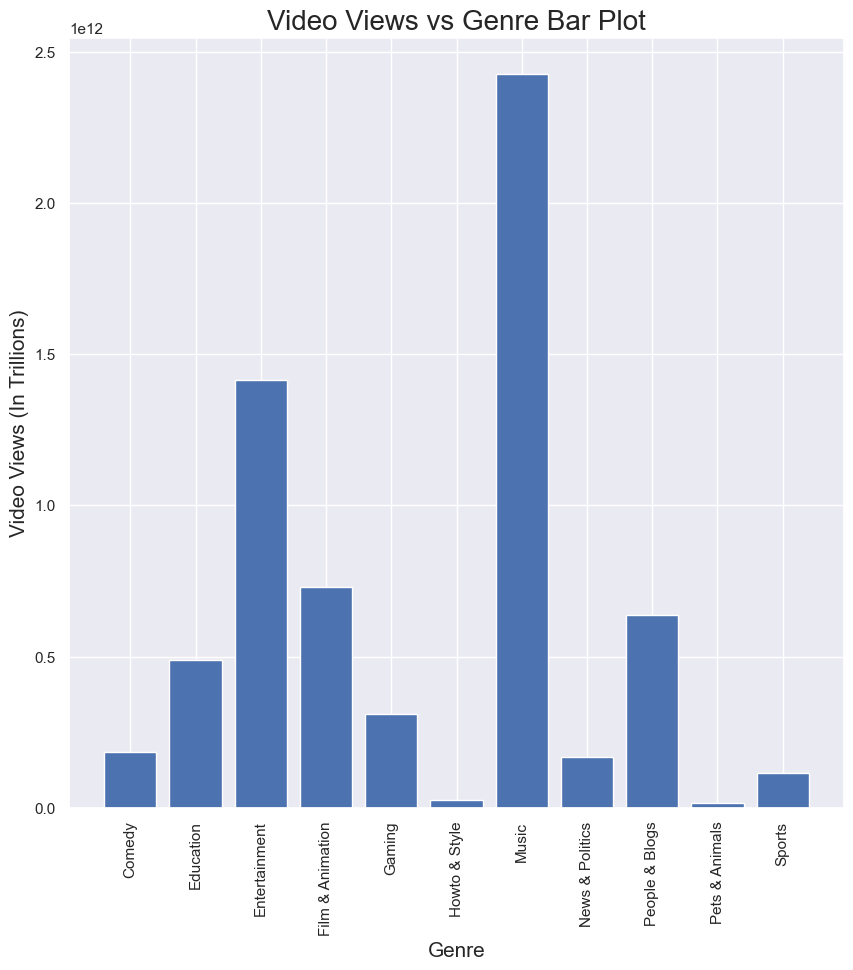

In [34]:
#Video Views vs Genre Bar Plot

plt.figure(figsize = (10,10))
plt.bar(list(VideoViewsGenrePivot.index), list(VideoViewsGenrePivot.Video_Views))
plt.title('Video Views vs Genre Bar Plot', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Video Views (In Trillions)', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

The top 3 genres with the most amount of total video views are the following: Music, Entertainment, and Film & Animation.

#### Second, we will explore the total amount of video count for each genre. 

We will repeat the same steps as the previous visualization.

In [35]:
#Create Video Count vs Genre Pivot Table

VideoCountGenrePivot = pd.pivot_table(GenrePivotSource, values='Video_Count', index='Genre', aggfunc='sum')
print(VideoCountGenrePivot)

                  Video_Count
Genre                        
Comedy                  23731
Education               14376
Entertainment         2246685
Film & Animation       413552
Gaming                 222900
Howto & Style            6022
Music                  402475
News & Politics       1638431
People & Blogs         590975
Pets & Animals            672
Sports                 115783


In [36]:
#Video Count vs Genre Pivot Table Sorted by Video Count

VideoCountGenrePivot.sort_values(by = 'Video_Count', ascending = False)

,Video_Count
Genre,
Entertainment,2246685
News & Politics,1638431
People & Blogs,590975
Film & Animation,413552
Music,402475
Gaming,222900
Sports,115783
Comedy,23731
Education,14376


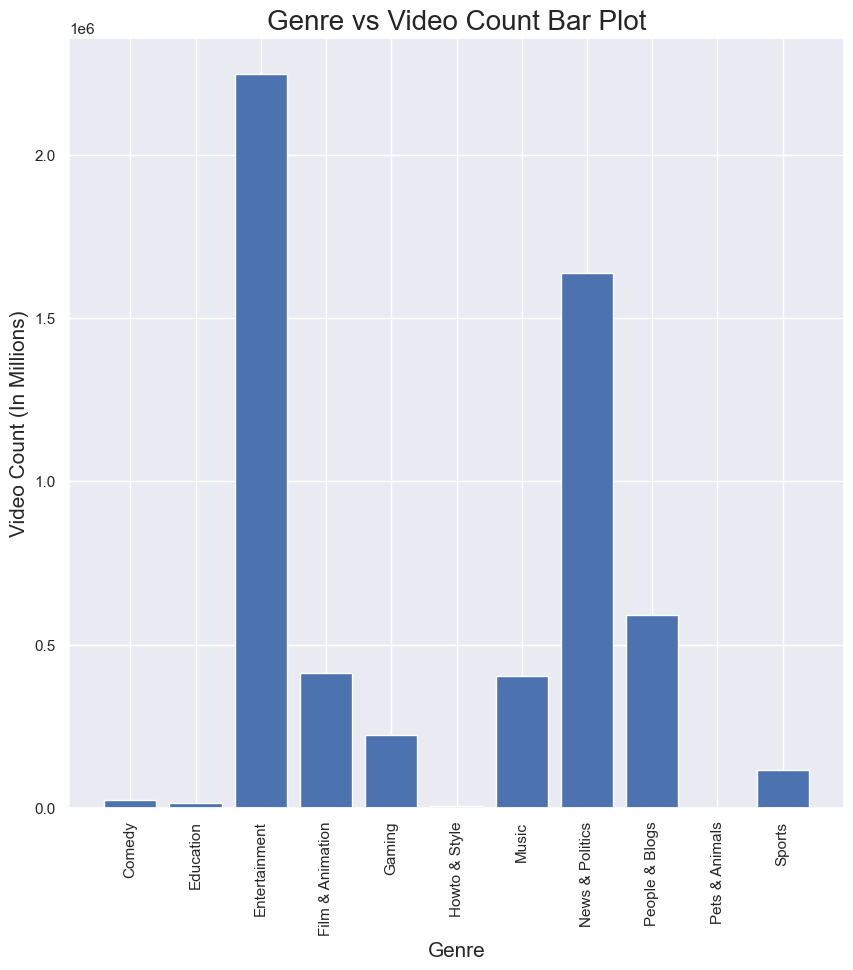

In [37]:
#Video Count vs Genre Bar Plot

plt.figure(figsize = (10,10))
plt.bar(list(VideoCountGenrePivot.index), list(VideoCountGenrePivot.Video_Count))
plt.title('Genre vs Video Count Bar Plot', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Video Count (In Millions)', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

The top 3 genres with the most amount of videos are Entertainment, News and Politics, and People & Blogs.

#### Third, we will explore the total amount of subscriber count for each genre.

We will repeat the same steps again.

In [38]:
#Create Subscriber Count vs Genre Pivot Table

SubscriberCountGenrePivot = pd.pivot_table(GenrePivotSource, values='Subscriber_Count', index='Genre', aggfunc='sum')
print(SubscriberCountGenrePivot)

                  Subscriber_Count
Genre                             
Comedy                   221730000
Education                629300000
Entertainment           1958290000
Film & Animation         995800000
Gaming                   580840000
Howto & Style             78900000
Music                   3583570000
News & Politics          244700000
People & Blogs           857250000
Pets & Animals            18900000
Sports                   181820000


In [39]:
#Subscriber Count vs Genre Pivot Table Sorted by Subscriber Count

SubscriberCountGenrePivot.sort_values(by = 'Subscriber_Count', ascending = False)

,Subscriber_Count
Genre,
Music,3583570000
Entertainment,1958290000
Film & Animation,995800000
People & Blogs,857250000
Education,629300000
Gaming,580840000
News & Politics,244700000
Comedy,221730000
Sports,181820000


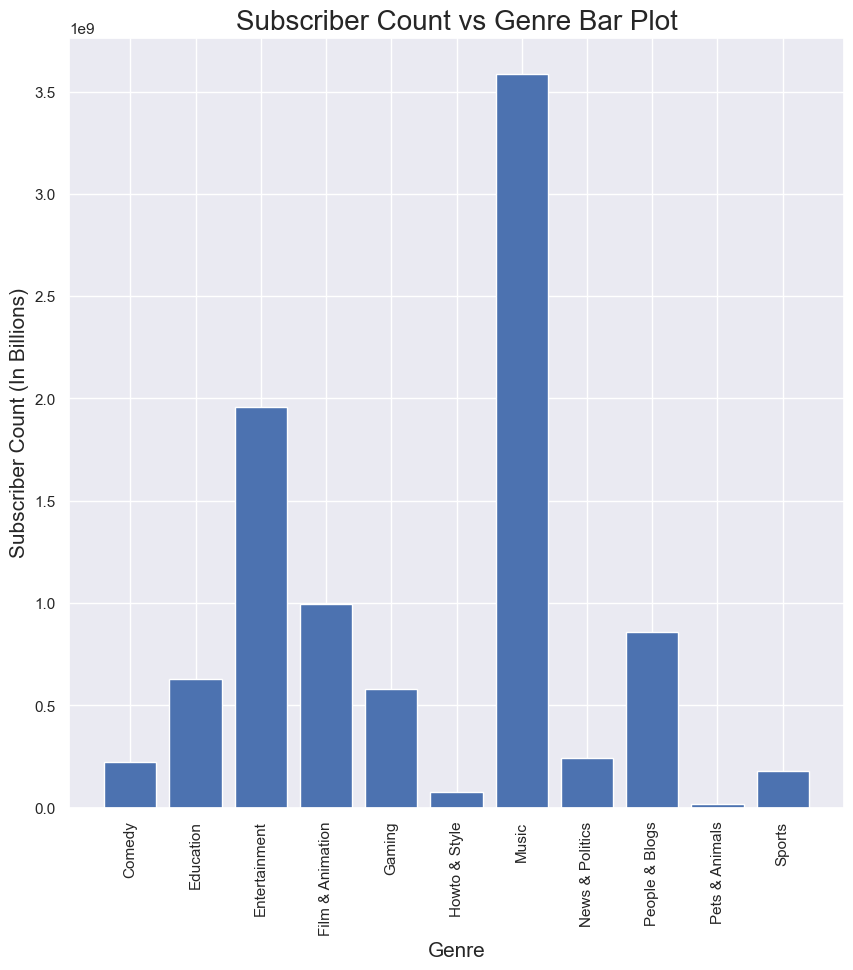

In [40]:
#Plot Subscriber Count vs Genre Bar Plot

plt.figure(figsize = (10,10))
plt.bar(list(SubscriberCountGenrePivot.index), list(SubscriberCountGenrePivot.Subscriber_Count))
plt.title('Subscriber Count vs Genre Bar Plot', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Subscriber Count (In Billions)', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

The top 3 genres with the most amount of subscribers are Music, Entertainment, and Film & Animation.

#### Looking at all 3 bar plots, it is of note the correlation between the top 3 genres with the most video views and the most subscribers, as they perfectly match.

#### It is also of note that when looking at video count, more videos do not translate to more views when considering genres. For instance, the News & Politics genre has the second most amount of videos, but much less total video views relative to other genres.

---

## 8. Channel Metrics vs Channel Started Bar Plots

In this section, we will explore the 3 channel metrics (Video Views, Video Count, and Subscriber Count) against the different years the channels were started using bar plots as visualizations.

We will use the same steps we took when analyzing the channel metrics against the unique genres. This time, instead of genre, we will use the years the channels were started.

We will first sort the dataset by Channel_Started.

We will then create a data frame to use as a data source for the pivot tables we will create to aggregate the channel metric values for each year.

Finally, we will plot the totals as bar plots.

In [41]:
#Sort Table by Channel Started

YTSortedByChannelStarted = ytclean.sort_values('Channel_Started', ascending=True)
YTSortedByChannelStarted

,Fixed_Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
288,289,NBA,19900000,11761981184,45177,Sports,2005
94,95,Rihanna,41200000,21484482902,82,Entertainment,2005
17,18,Zee TV,65900000,42064672138,98369,Entertainment,2005
54,55,Shakira,40800000,25929013006,308,People & Blogs,2005
143,144,Beyoncé,25600000,16730963436,238,Music,2005
...,...,...,...,...,...,...,...
270,271,XO TEAM,12400000,12161624272,2786,People & Blogs,2021
222,223,ZutiGang,12400000,13546973241,1135,People & Blogs,2021
92,93,LeoNata Family,16200000,21562386713,1871,People & Blogs,2021
182,183,MoniLina,10900000,14960422456,746,Comedy,2021


In [42]:
#Create Channel Started Pivot Table Source Data Frame

ChannelStartedPivotSource = pd.DataFrame({'Channel_Started': list(YTSortedByChannelStarted['Channel_Started']), 
                                          'Subscriber_Count': list(YTSortedByChannelStarted['Subscriber_Count']),
                                          'Video_Views': list(YTSortedByChannelStarted['Video_Views']),
                                          'Video_Count': list(YTSortedByChannelStarted['Video_Count'])})

ChannelStartedPivotSource

,Channel_Started,Subscriber_Count,Video_Views,Video_Count
0,2005,19900000,11761981184,45177
1,2005,41200000,21484482902,82
2,2005,65900000,42064672138,98369
3,2005,40800000,25929013006,308
4,2005,25600000,16730963436,238
...,...,...,...,...
291,2021,12400000,12161624272,2786
292,2021,12400000,13546973241,1135
293,2021,16200000,21562386713,1871
294,2021,10900000,14960422456,746


#### We will start with Video Views vs Channel Started.

In [43]:
#Create Video Views vs Channel Started Pivot Table

VideoViewsChannelStartedPivot = pd.pivot_table(ChannelStartedPivotSource, values='Video_Views', index='Channel_Started', aggfunc='sum')
print(VideoViewsChannelStartedPivot)

                   Video_Views
Channel_Started               
2005              197702036545
2006             1126734229518
2007              527673065607
2008              413778449662
2009              519017229248
2010              296312227850
2011              500352044855
2012              541549475227
2013              409259025463
2014              661923052989
2015              375409623246
2016              454705961678
2017               75386091172
2018              167705145477
2019               26198962430
2020               90958791027
2021              126232324615


In [44]:
#Video Views vs Channel Started Pivot Table Sorted by Video Views

VideoViewsChannelStartedPivot.sort_values(by = 'Video_Views', ascending = False)

,Video_Views
Channel_Started,
2006,1126734229518
2014,661923052989
2012,541549475227
2007,527673065607
2009,519017229248
2011,500352044855
2016,454705961678
2008,413778449662
2013,409259025463


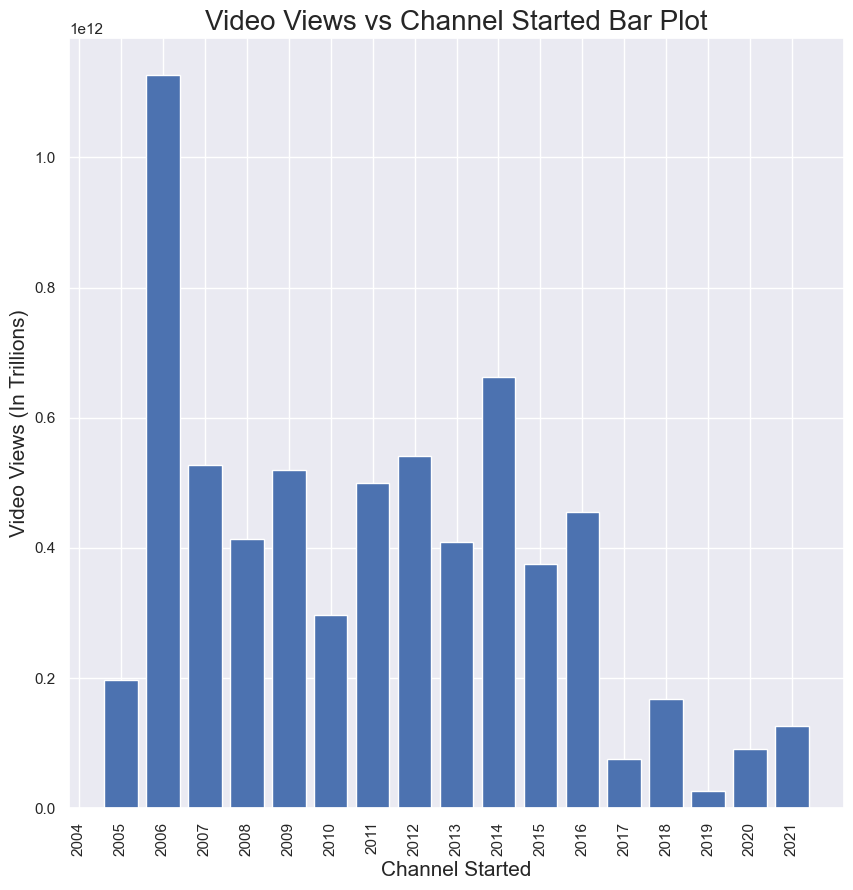

In [45]:
#Plot Video Views vs Channel Started Bar Plot

plt.figure(figsize = (10,10))
plt.bar(list(VideoViewsChannelStartedPivot.index), list(VideoViewsChannelStartedPivot.Video_Views))
plt.title('Video Views vs Channel Started Bar Plot', fontsize = 20)
plt.xlabel('Channel Started', fontsize = 15)
plt.ylabel('Video Views (In Trillions)', fontsize = 15)
plt.xticks(np.arange(2004, 2022, 1), rotation = 90)
plt.show()

Channels that were started in 2006 have the most video views as an aggregate. This might make sense logically taking into account that since YouTube started in 2005, channels started earlier would have more views. However, the amount of video views in aggregate spread out amongst the other years are relatively even, with 2014 having the second highest amount. 2006 is a standout year, also because the #1 ranked YouTube channel, T-Series, started in 2006.

#### Next, we will look at Video Count vs Channel Started.

In [46]:
#Create Video Count vs Channel Started Pivot Table

VideoCountChannelStartedPivot = pd.pivot_table(ChannelStartedPivotSource, values='Video_Count', index='Channel_Started', aggfunc='sum')
print(VideoCountChannelStartedPivot)

                 Video_Count
Channel_Started             
2005                  336783
2006                  994997
2007                  825809
2008                  533513
2009                  408680
2010                  408202
2011                  253963
2012                  566760
2013                  290349
2014                  620732
2015                  124318
2016                  185661
2017                    2978
2018                   96842
2019                    2299
2020                    8280
2021                   15436


In [47]:
#Video Count vs Channel Started Pivot Table Sorted by Video Count

VideoCountChannelStartedPivot.sort_values(by = 'Video_Count', ascending = False)

,Video_Count
Channel_Started,
2006,994997
2007,825809
2014,620732
2012,566760
2008,533513
2009,408680
2010,408202
2005,336783
2013,290349


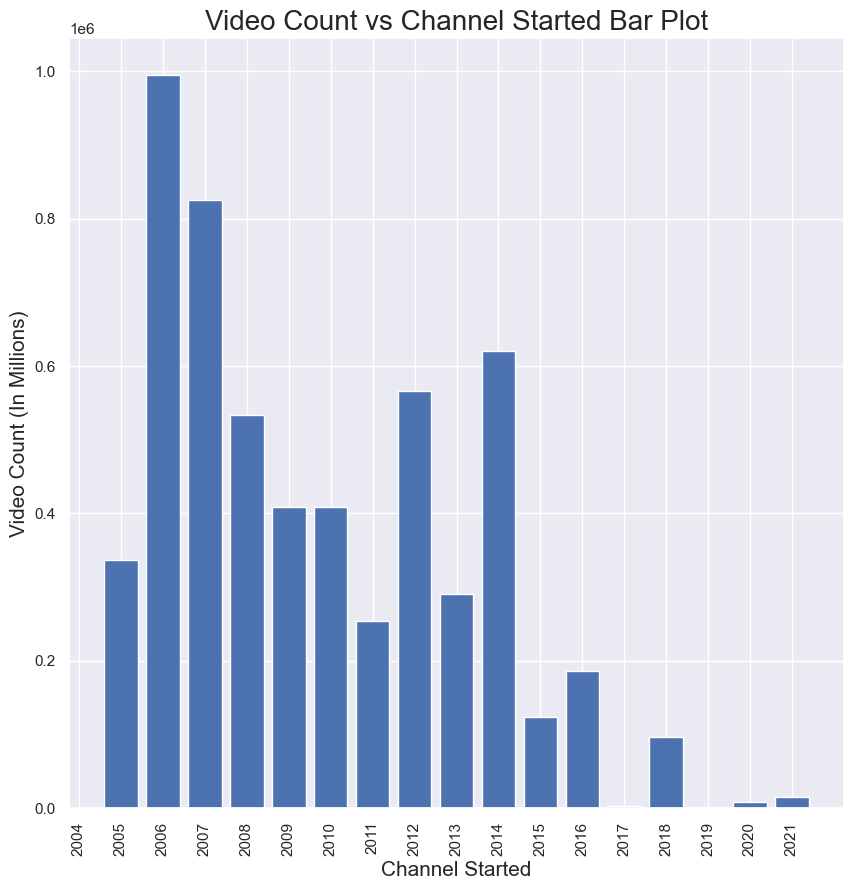

In [48]:
#Plot Video Count vs Channel Started Bar Plot

plt.figure(figsize = (10,10))
plt.bar(list(VideoCountChannelStartedPivot.index), list(VideoCountChannelStartedPivot.Video_Count))
plt.title('Video Count vs Channel Started Bar Plot', fontsize = 20)
plt.xlabel('Channel Started', fontsize = 15)
plt.ylabel('Video Count (In Millions)', fontsize = 15)
plt.xticks(np.arange(2004, 2022, 1), rotation = 90)
plt.show()

Channels that were started in 2006 and 2007 have the most amount of videos in aggregate. Logically speaking, this might make sense as channels started earlier would have more videos over time. The total amount of videos each year afterward do not follow any specific pattern, but it is of note that channels started in 2014 sees a spike in total videos created to-date (based on when the raw dataset was extracted). In the previous bar plot, channels started in 2014 also has the second highest amount of video views in aggregate. It seems to be a notable year for YouTube content creators.

#### Finally, we will look at Subscriber Count vs Channel Started.

In [49]:
#Create Subscriber Count vs Channel Started Pivot Table

SubscriberCountChannelStartedPivot = pd.pivot_table(ChannelStartedPivotSource, values='Subscriber_Count', index='Channel_Started', aggfunc='sum')
print(SubscriberCountChannelStartedPivot)

                 Subscriber_Count
Channel_Started                  
2005                    311400000
2006                   1436500000
2007                    765300000
2008                    579900000
2009                    718310000
2010                    477500000
2011                    643960000
2012                    977570000
2013                    604970000
2014                    978150000
2015                    549800000
2016                    668440000
2017                    153400000
2018                    234800000
2019                     18300000
2020                    110100000
2021                    122700000


In [50]:
#Subscriber Count vs Channel Started Pivot Table Sorted by Subscriber Count

SubscriberCountChannelStartedPivot.sort_values(by = 'Subscriber_Count', ascending = False)

,Subscriber_Count
Channel_Started,
2006,1436500000
2014,978150000
2012,977570000
2007,765300000
2009,718310000
2016,668440000
2011,643960000
2013,604970000
2008,579900000


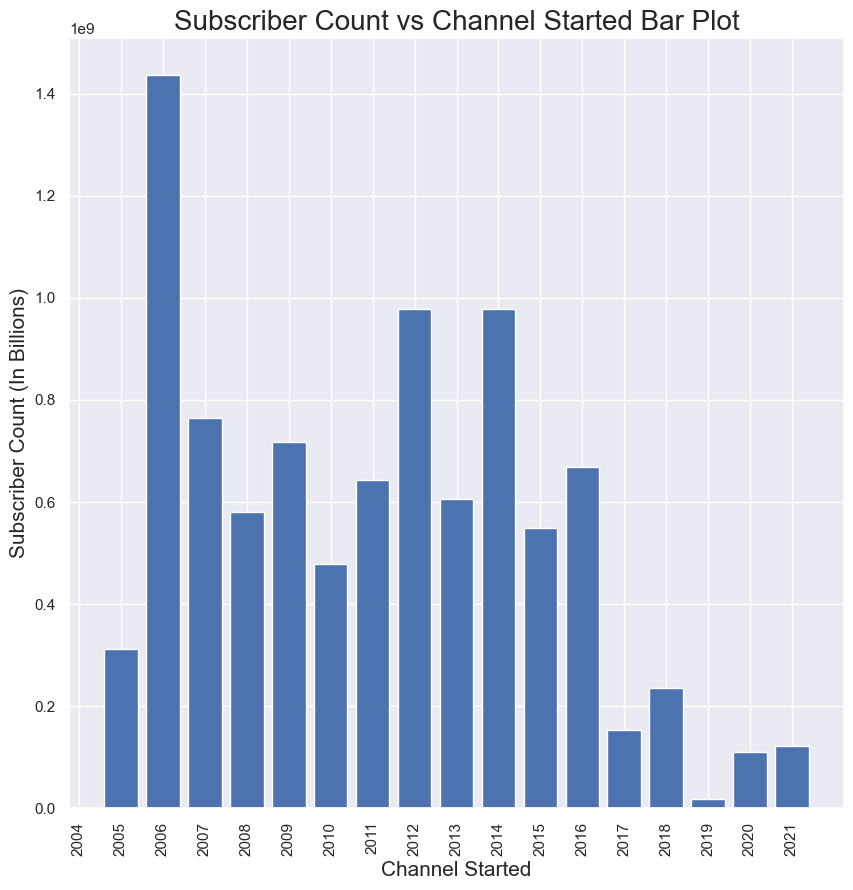

In [51]:
#Plot Subscriber Count vs Channel Started Bar Plot

plt.figure(figsize = (10,10))
plt.bar(list(SubscriberCountChannelStartedPivot.index), list(SubscriberCountChannelStartedPivot.Subscriber_Count))
plt.title('Subscriber Count vs Channel Started Bar Plot', fontsize = 20)
plt.xlabel('Channel Started', fontsize = 15)
plt.ylabel('Subscriber Count (In Billions)', fontsize = 15)
plt.xticks(np.arange(2004, 2022, 1), rotation = 90)
plt.show()

Channels started in 2006, 2012, and 2014 have the most subscribers in aggregate. It is of note that channels started in these three years also correlate with the most total views.

---

## 8) Scatterplots

In this section, we will explore relationships between the 3 channel metrics using scatterplots.

A channel's video views is a key metric and its relationships with a channel's video count and subscriber count are points of interest. We will explore these 2 relationships.

A channel's subscriber count is also a key metric and its relationship with a channel's video count is a point of interest. We will explore this relationship as well.

The first step will be to create the variables needed for the scatterplots.

In [52]:
#Create Scatterplot Variables

VideoViews = ytclean['Video_Views']
VideoCount = ytclean['Video_Count']
SubscriberCount = ytclean['Subscriber_Count']
Genre = ytclean['Genre']
ChannelStarted = ytclean['Channel_Started']

The next step is to create the scatterplot.

#### We will start with Video Views vs Video Count.

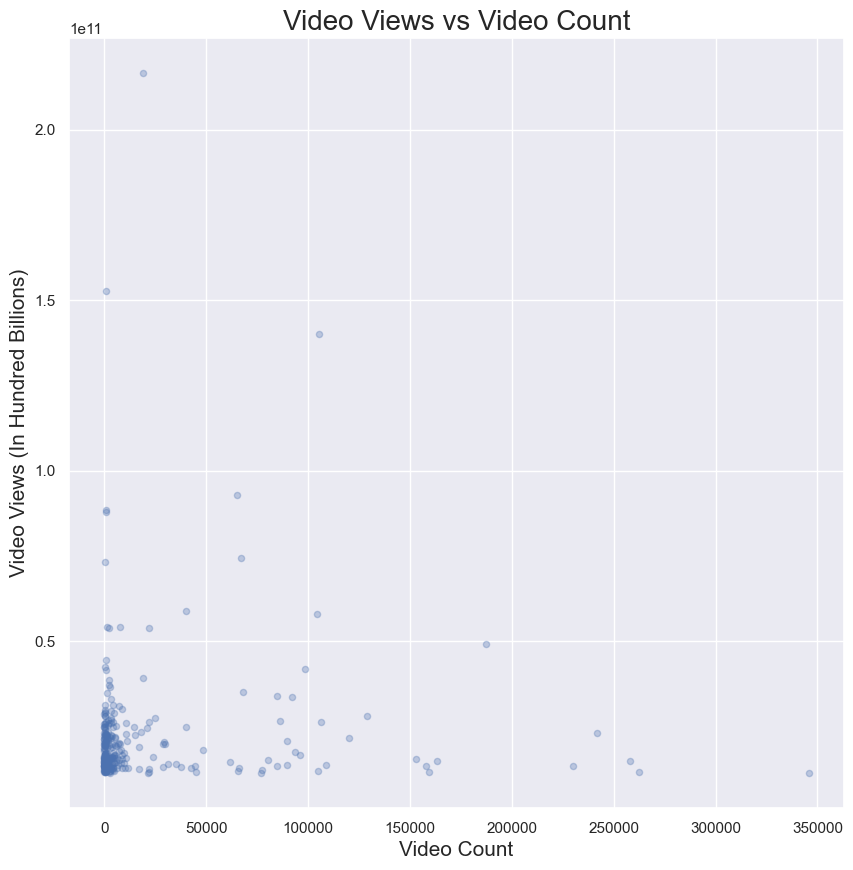

In [53]:
#Video Views vs Video Count Scatterplot

plt.figure(figsize = (10,10))
plt.scatter(VideoCount, VideoViews, s = 20, alpha = 0.3)
plt.title('Video Views vs Video Count', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Based on the Video Views vs Video Count scatterplot, there appears to be a negative correlation between the 2 variables. However, much of the datapoints are concentrated near the origin. It seems that a channel's video views is not dependent on its video count.

The following Video Views vs Video Count scatterplots adds a third dimension of Genre and Year Channel Started to visualize where these categories fall within the scatterplots.

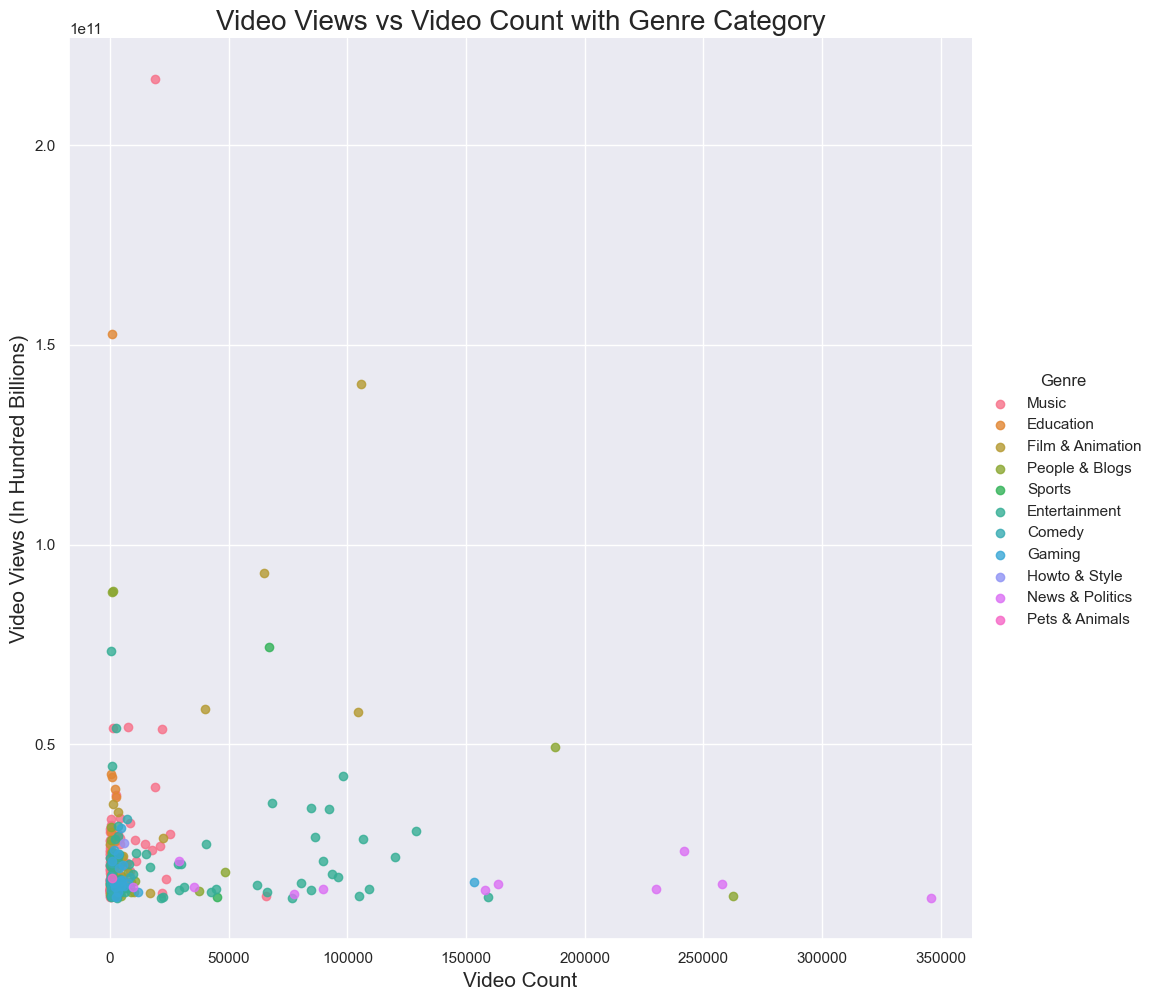

In [54]:
#Video Views vs Video Count with Genre Category Plot

sns.lmplot(data = ytclean, x = 'Video_Count', y = 'Video_Views', 
                 fit_reg = False, hue = 'Genre',
                 height = 10)
plt.title('Video Views vs Video Count with Genre Category', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The genres are spread out within the Video Views vs Video Count scatterplot.

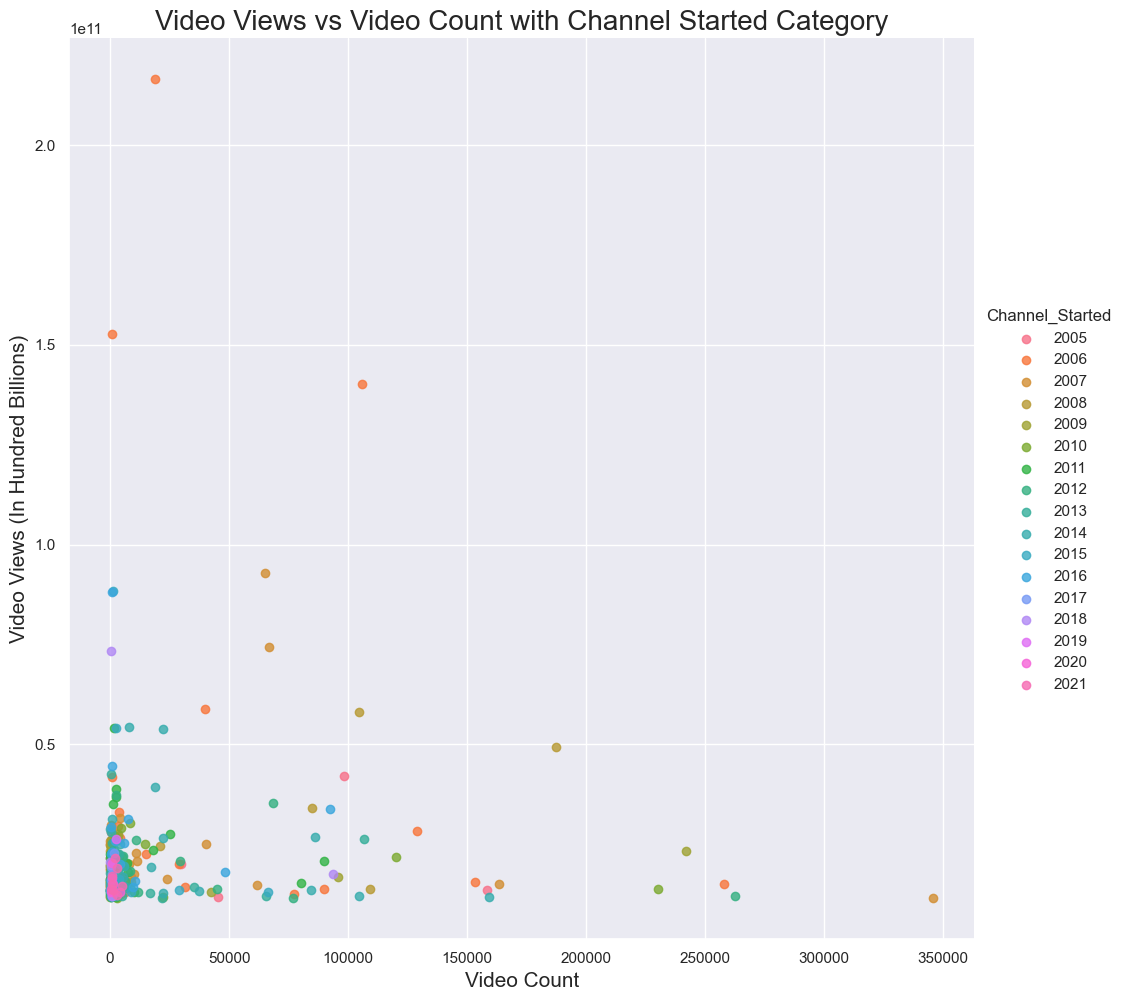

In [55]:
#Video Views vs Video Count with Channel Started Category Plot

sns.lmplot(data = ytclean, x = 'Video_Count', y = 'Video_Views', 
                 fit_reg = False, hue = 'Channel_Started',
                 height = 10)
plt.title('Video Views vs Video Count with Channel Started Category', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The years more or less follow a pattern where older channels are further from the origin whereas newer channels are closer to the origin, which makes sense based as time is possibly correlated with a channel's video views and video count.

#### The next scatterplot is Video Views vs Subscriber Count.

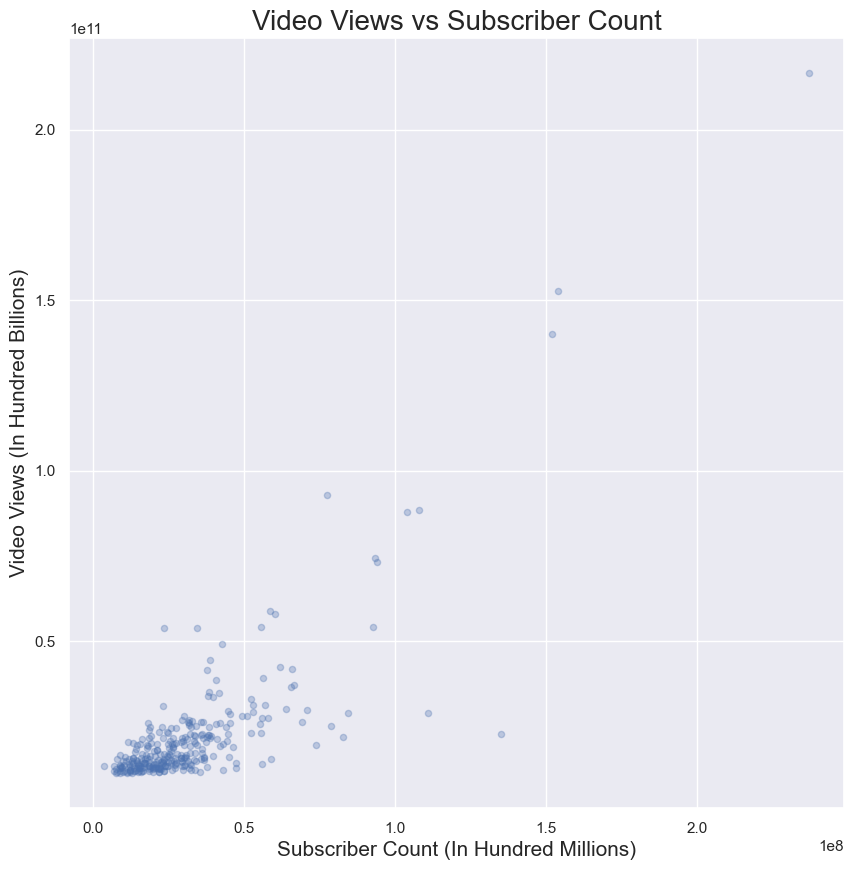

In [56]:
#Video Views vs Subscriber Count Scatterplot

plt.figure(figsize = (10,10))
plt.scatter(SubscriberCount, VideoViews, s = 20, alpha = 0.3)
plt.title('Video Views vs Subscriber Count', fontsize = 20)
plt.xlabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Based on the Video Views vs Subscriber Count scatterplot, there appears to be a positive correlation between the 2 variables. This makes sense as a channel's video views can depend greatly on the number of subscribers it has.

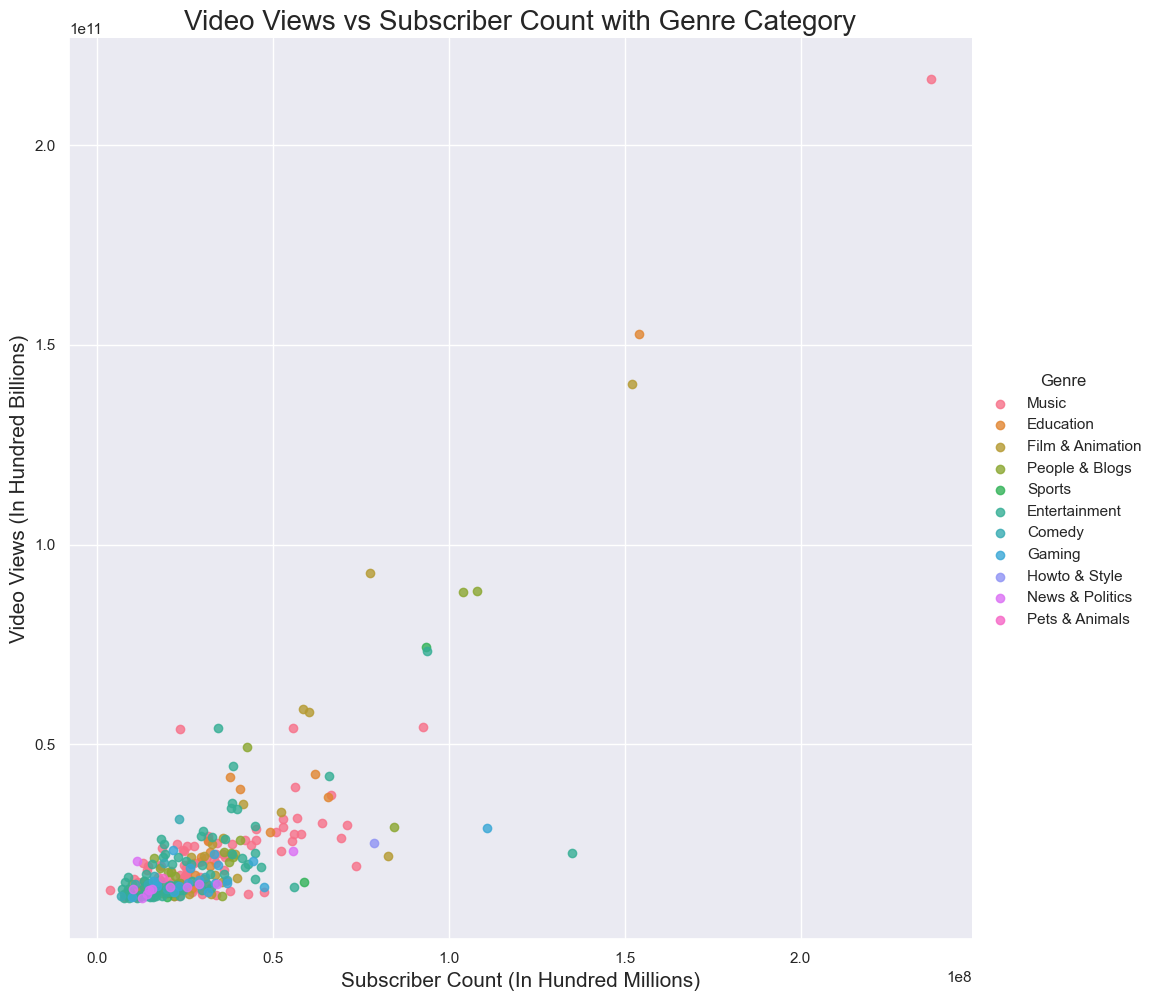

In [57]:
#Video Views vs Subscriber Count with Genre Category Plot

sns.lmplot(data = ytclean, x = 'Subscriber_Count', y = 'Video_Views', 
                 fit_reg = False, hue = 'Genre',
                 height = 10)
plt.title('Video Views vs Subscriber Count with Genre Category', fontsize = 20)
plt.xlabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The genres are spread out within the Video Views vs Subscriber Count scatterplot.

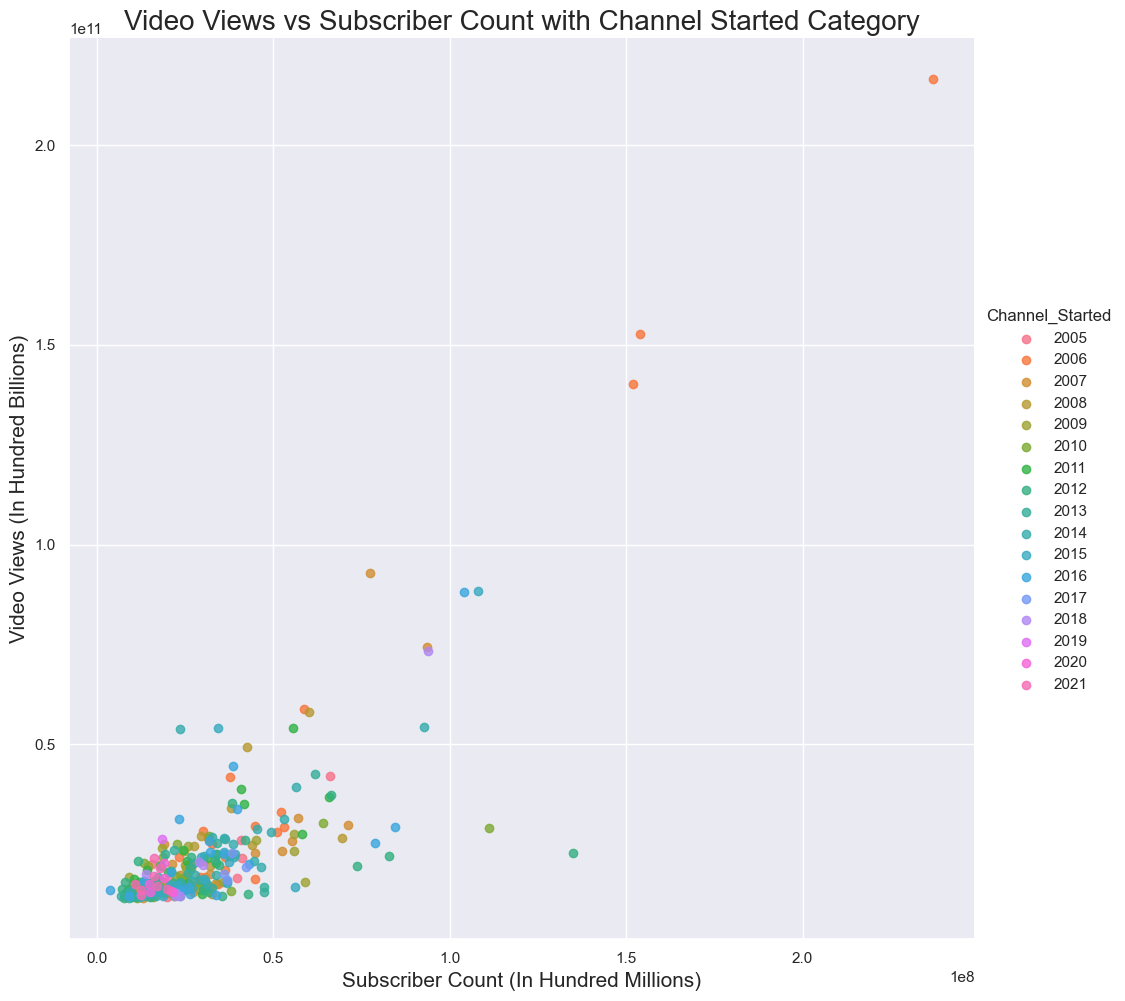

In [58]:
#Video Views vs Subscriber Count with Channel Started Category Plot

sns.lmplot(data = ytclean, x = 'Subscriber_Count', y = 'Video_Views', 
                 fit_reg = False, hue = 'Channel_Started',
                 height = 10)
plt.title('Video Views vs Subscriber Count with Channel Started Category', fontsize = 20)
plt.xlabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The years the channels were started are spread out within the Video Views vs Subscriber Count scatterplot.

#### The next scatterplot is Subscriber Count vs Video Count.

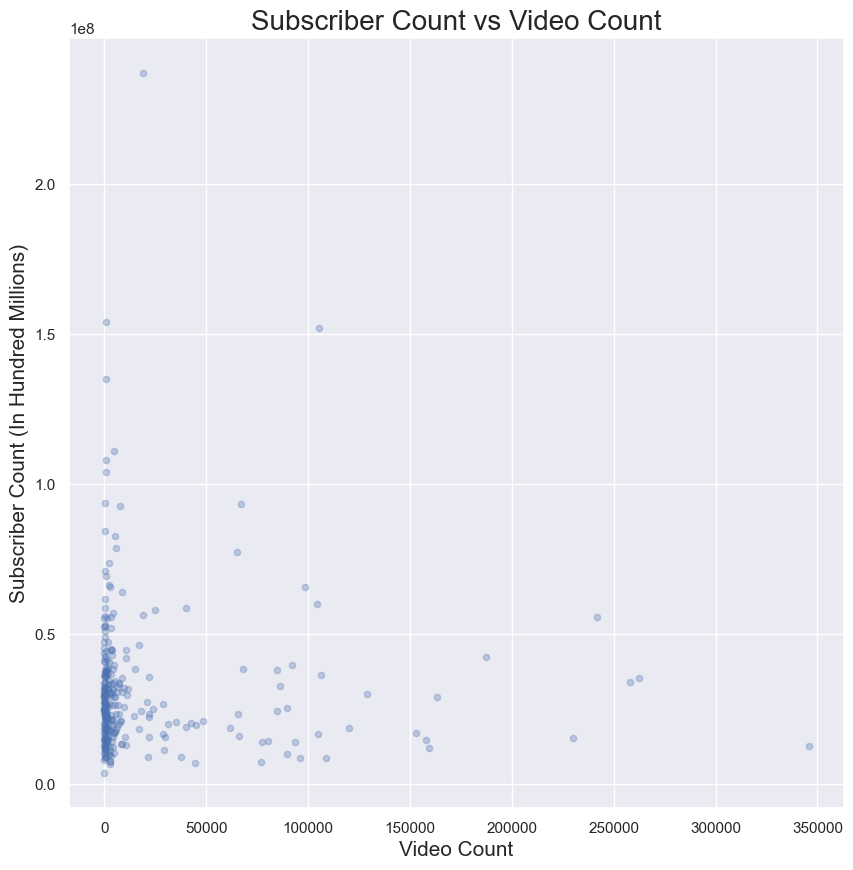

In [59]:
#Subscriber Count vs Video Count Scatterplot

plt.figure(figsize = (10,10))
plt.scatter(VideoCount, SubscriberCount, s = 20, alpha = 0.3)
plt.title('Subscriber Count vs Video Count', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Based on the Subscriber Count vs Video Count scatterplot, there appears to be a negative correlation between the 2 variables. However, there is a concentration of datapoints near the origin varying from approximately 10 million to 40 million subscribers with less than 10k subscribers. There appears to be no relationship between subscriber count and video count.

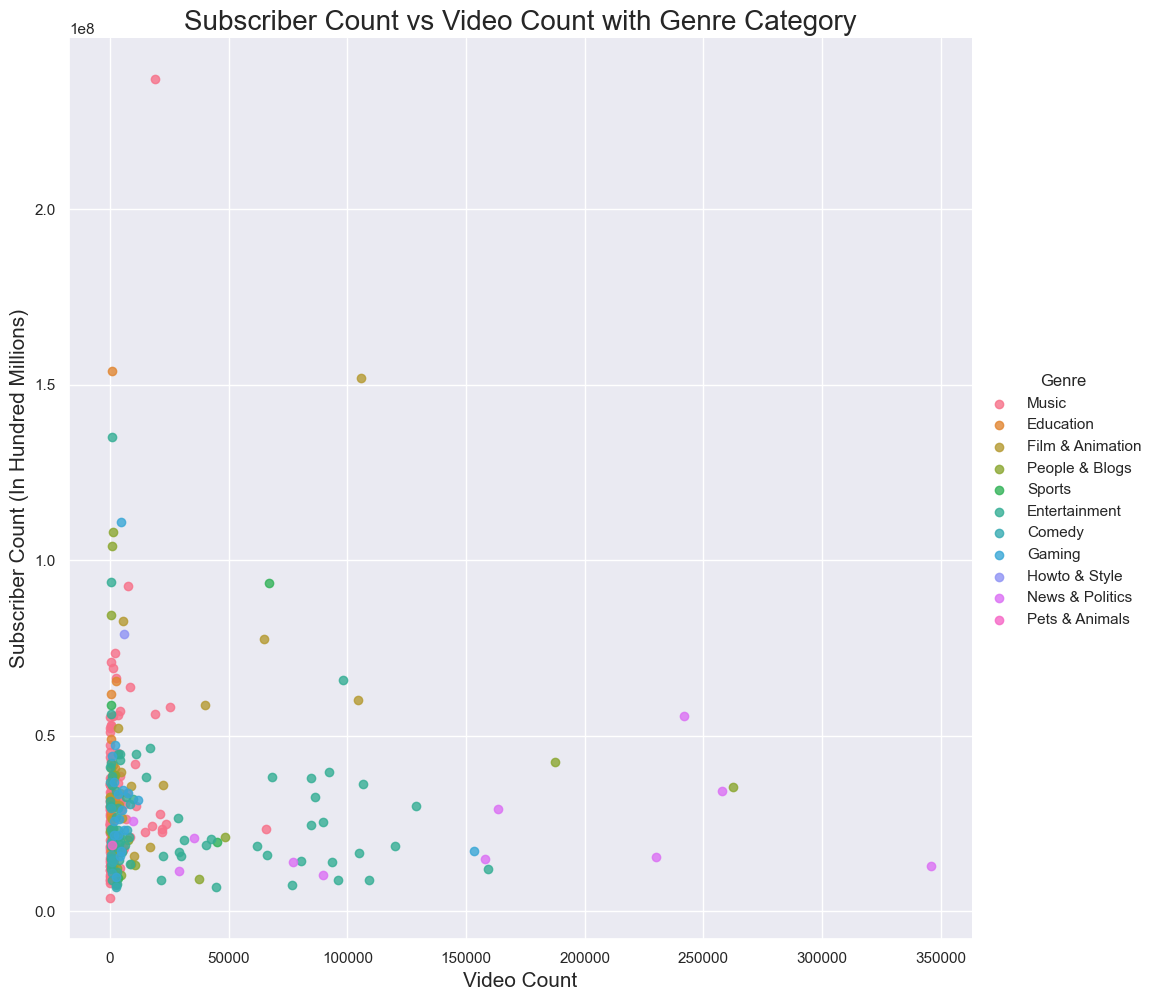

In [60]:
#Subscriber Count vs Video Count with Genre Category Plot

sns.lmplot(data = ytclean, x = 'Video_Count', y = 'Subscriber_Count', 
                 fit_reg = False, hue='Genre',
                 height = 10)
plt.title('Subscriber Count vs Video Count with Genre Category', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The genres are spread out within the Subscriber Count vs Video Count scatterplot.

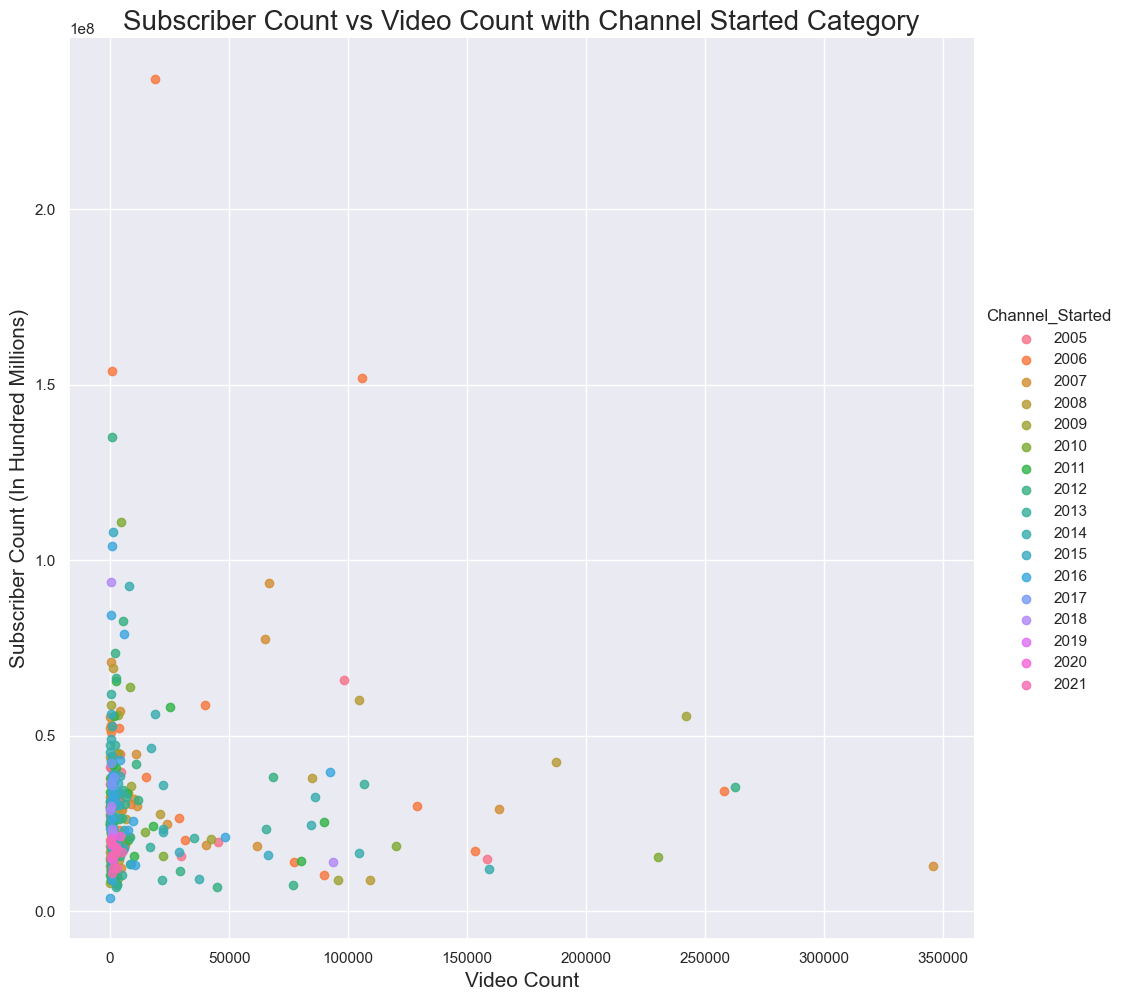

In [61]:
#Subscriber Count vs Video Count with Channel Started Category Plot

sns.lmplot(data = ytclean, x = 'Video_Count', y = 'Subscriber_Count', 
                 fit_reg = False, hue = 'Channel_Started',
                 height = 10)
plt.title('Subscriber Count vs Video Count with Channel Started Category', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The years the channels were started are spread out within the Subscriber Count vs Video Count scatterplot.

---

## 9) Clustering Analyses

In this section, we will use the 3 scatterplots from the previous section (Video Views vs Video Count, Video Views vs Subscriber Count, and Subscriber Count vs Video Count) and apply clustering analyses on them to determine any insights by dividing the datapoints into groups.

We will use the K-means clustering method for all 3 scatterplots.

The first step is to create a table of the independent and dependent variables.

#### We will start with Video Views vs Video Count.

We will create a table of the independent and dependent variables.

In [62]:
#Clustering Analysis: Video Views vs Video Count 

#Independent Variable and Dependent Variable Table

VideoViewsVideoCount = ytclean[['Video_Count', 'Video_Views']]
VideoViewsVideoCount

,Video_Count,Video_Views
0,18831,216495600668
1,861,152638999634
2,105649,140138068504
3,65028,92952274861
4,1070,88452629066
...,...,...
291,440,11618626248
292,2789,11586962179
293,76838,11512332695
294,21617,11442069884


Next, we will use the Elbow Method using the KMeans function to determine the number of clusters (groups) should be used.

In [63]:
#Determining the number of clusters (Video Count vs Video Views) using The Elbow Method

wcssVideoViewsVideoCount = []

for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(VideoViewsVideoCount)
    wcssVideoViewsVideoCount_iter = kmeans.inertia_
    wcssVideoViewsVideoCount.append(wcssVideoViewsVideoCount_iter)
    
wcssVideoViewsVideoCount

[1.1131745937798222e+23,
 3.894596763354809e+22,
 1.7766245432559806e+22,
 1.0038017137570606e+22,
 6.699869069909288e+21,
 3.419619030332755e+21,
 2.1286400171064725e+21,
 1.378508082624069e+21]

The below graph shows a plot between the Within-Cluster Sum of Squares vs the Number of Clusters. The number of optimal clusters can be determined by looking at which number of clusters the line's deceleration starts to level out. In this instace, it is 3 clusters.

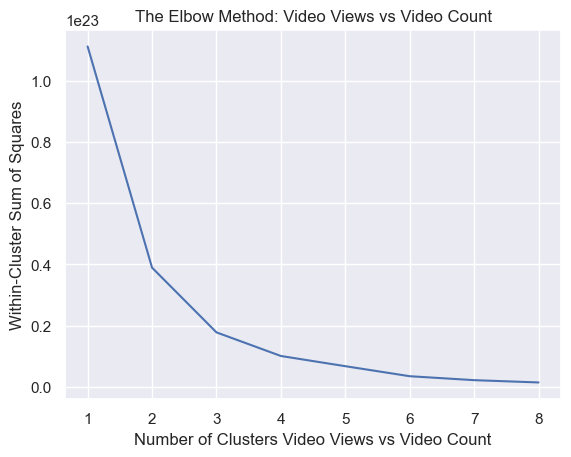

In [64]:
#The Elbow Method: Video Views vs Video Count Graph

NumberClustersVideoViewsVideoCount = range(1,9)
plt.plot(NumberClustersVideoViewsVideoCount, wcssVideoViewsVideoCount)
plt.title('The Elbow Method: Video Views vs Video Count')
plt.xlabel('Number of Clusters Video Views vs Video Count')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

We will use the 3 clusters to group the datapoints together.

In [65]:
#Clustering Video Views vs Video Count using 3 Clusters

xvarVideoViewsVideoCount = ytclean[['Video_Count']]

kmeansVideoViewsVideoCount = KMeans(3)
kmeansVideoViewsVideoCount.fit(xvarVideoViewsVideoCount)

KMeans(n_clusters=3)

In [66]:
#Clustering Video Views vs Video Count Results

IdentifiedClustersVideoViewsVideoCount = kmeansVideoViewsVideoCount.fit_predict(xvarVideoViewsVideoCount)
IdentifiedClustersVideoViewsVideoCount

array([0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 1], dtype=int32)

A cluster column will be added to the initial table created based on the above list that has grouped the channels into 3 separate clusters.

In [67]:
#Updating Video Views and Video Count Table

VideoViewsVideoCountWithClusters = VideoViewsVideoCount.copy()
VideoViewsVideoCountWithClusters['Cluster'] = IdentifiedClustersVideoViewsVideoCount
VideoViewsVideoCountWithClusters

,Video_Count,Video_Views,Cluster
0,18831,216495600668,0
1,861,152638999634,0
2,105649,140138068504,2
3,65028,92952274861,2
4,1070,88452629066,0
...,...,...,...
291,440,11618626248,0
292,2789,11586962179,0
293,76838,11512332695,2
294,21617,11442069884,0


The scatterplot with clustering will now be plotted.

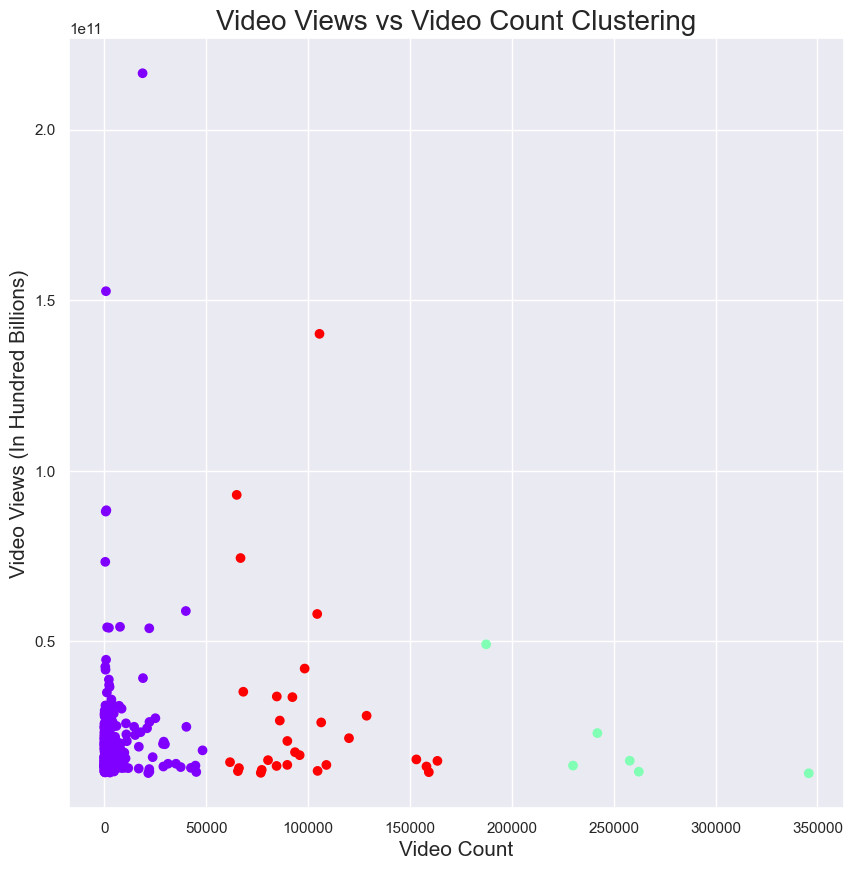

In [68]:
#Plotting the Video Views vs Video Count Clustering Results

plt.figure(figsize = (10,10))
plt.scatter(VideoViewsVideoCountWithClusters['Video_Count'], VideoViewsVideoCountWithClusters['Video_Views'], c = VideoViewsVideoCountWithClusters['Cluster'], cmap='rainbow')
plt.title('Video Views vs Video Count Clustering', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Based on the above scatterplot, the clusters are divided between the following video count ranges: Less than 50k videos, between 50k and approximately 180k videos, and over 180k videos. A majority of YouTube channels within the Top 300 have less than 50k videos, a handful between 50k to 180k, and only a few over 180k. There may not be any useful insights from this cluster analysis, other than channels can do garner views without having to be excessive in video count.

#### The next clustering analyses will use the same steps as the first, but this time we will take a look at Video Views vs Subscriber Count and Subscriber Count vs Video Count.

#### Next, we will analyze Video Views vs Subscriber Count.

In [69]:
#Clustering Analysis: Video Views vs Subscriber Count

#Independent Variable and Dependent Variable Table

VideoViewsSubscriberCount = ytclean[['Subscriber_Count', 'Video_Views']]
VideoViewsSubscriberCount

,Subscriber_Count,Video_Views
0,237000000,216495600668
1,154000000,152638999634
2,152000000,140138068504
3,77500000,92952274861
4,108000000,88452629066
...,...,...
291,15000000,11618626248
292,11300000,11586962179
293,7580000,11512332695
294,9040000,11442069884


In [70]:
#Determining number of clusters (Video Views vs Subscriber Count) using The Elbow Method

wcssVideoViewsSubscriberCount = []

for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(VideoViewsSubscriberCount)
    wcssVideoViewsSubscriberCount_iter = kmeans.inertia_
    wcssVideoViewsSubscriberCount.append(wcssVideoViewsSubscriberCount_iter)
    
wcssVideoViewsSubscriberCount

[1.1131763955888668e+23,
 3.8946072202631665e+22,
 1.7766336294266832e+22,
 1.0038085067926789e+22,
 6.696349553332468e+21,
 3.419899930329122e+21,
 2.128695806431534e+21,
 1.377849387753193e+21]

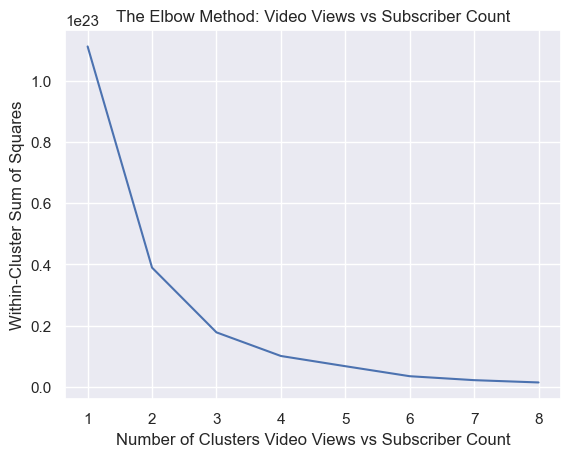

In [71]:
#The Elbow Method: Video Count vs Subscriber Count Graph

NumberClustersVideoViewsSubscriberCount = range(1,9)
plt.plot(NumberClustersVideoViewsSubscriberCount, wcssVideoViewsSubscriberCount)
plt.title('The Elbow Method: Video Views vs Subscriber Count')
plt.xlabel('Number of Clusters Video Views vs Subscriber Count')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [72]:
#Clustering Video Views vs Subscriber Count using 3 Clusters

xvarVideoViewsSubscriberCount = ytclean[['Subscriber_Count']]

kmeansVideoViewsSubscriberCount = KMeans(3)
kmeansVideoViewsSubscriberCount.fit(xvarVideoViewsSubscriberCount)

KMeans(n_clusters=3)

In [73]:
#Clustering Video Views vs Subscriber Count Results

IdentifiedClustersVideoViewsSubscriberCount = kmeansVideoViewsSubscriberCount.fit_predict(xvarVideoViewsSubscriberCount)
IdentifiedClustersVideoViewsSubscriberCount

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [74]:
#Updating Video Views and Subscriber Count Table

VideoViewsSubscriberCountWithClusters = VideoViewsSubscriberCount.copy()
VideoViewsSubscriberCountWithClusters['Cluster'] = IdentifiedClustersVideoViewsSubscriberCount
VideoViewsSubscriberCountWithClusters

,Subscriber_Count,Video_Views,Cluster
0,237000000,216495600668,1
1,154000000,152638999634,1
2,152000000,140138068504,1
3,77500000,92952274861,2
4,108000000,88452629066,1
...,...,...,...
291,15000000,11618626248,0
292,11300000,11586962179,0
293,7580000,11512332695,0
294,9040000,11442069884,0


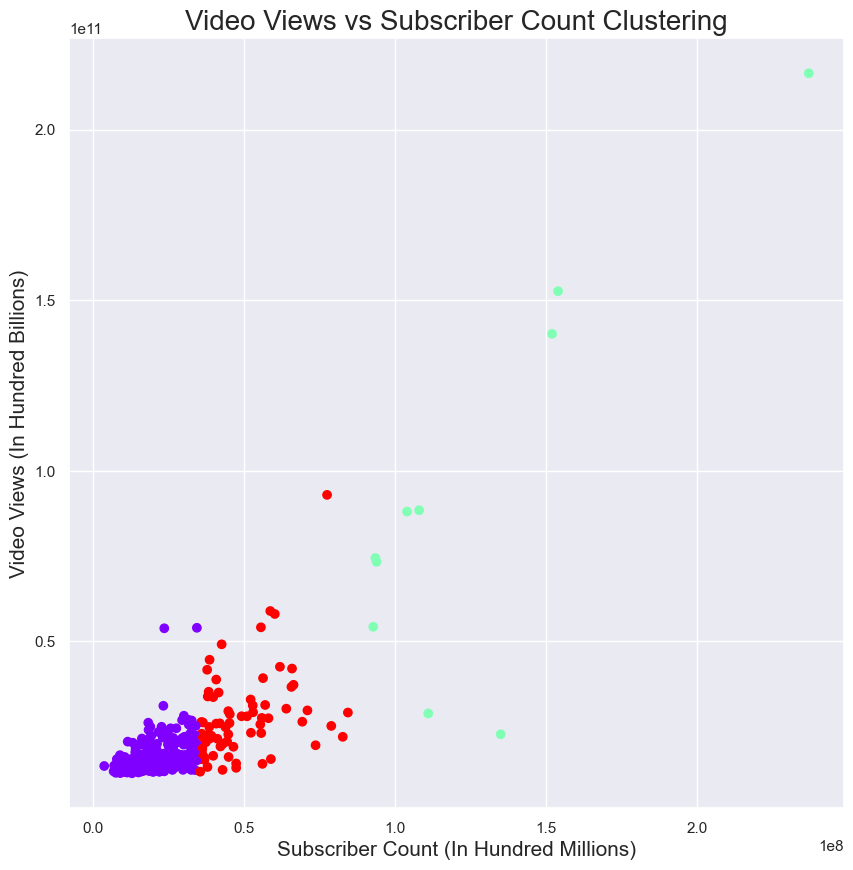

In [75]:
#Plotting the Video Views vs Subscriber Count Clustering Results

plt.figure(figsize = (10,10))
plt.scatter(VideoViewsSubscriberCountWithClusters['Subscriber_Count'], VideoViewsSubscriberCountWithClusters['Video_Views'], c = VideoViewsSubscriberCountWithClusters['Cluster'], cmap='rainbow')
plt.title('Video Views vs Subscriber Count Clustering', fontsize = 20)
plt.xlabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Based on the above scatterplot, we can see that the clusters display higher video views with more subscribers. Channels with 10 million to ~40 million subscribers will have total video views most likely under 40 billion. If we move over to channels with over 40 million and less than ~90 million subscribers, a majority will be under 50 billion video views, but a handful will surpass that threshold (more than channels with 10-40 million subscribers). Finally, channels with over 90 million subscribers are likely to have more than 50 billion total views, with a couple surpassing the 100 billion views threshold. The positive correlation between video views and subscriber count becomes more apparent within this clustering analysis.

#### Finally, we will analyze Subscriber Count vs Video Count.

In [76]:
#Clustering Analysis: Subscriber Count vs Video Count 

#Independent Variable and Dependent Variable Table

SubscriberCountVideoCount = ytclean[['Video_Count', 'Subscriber_Count']]
SubscriberCountVideoCount

,Video_Count,Subscriber_Count
0,18831,237000000
1,861,154000000
2,105649,152000000
3,65028,77500000
4,1070,108000000
...,...,...
291,440,15000000
292,2789,11300000
293,76838,7580000
294,21617,9040000


In [77]:
#Determining the number of clusters (Subscriber Count vs Video Count) using The Elbow Method

wcssSubscriberCountVideoCount = []

for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(SubscriberCountVideoCount)
    wcssSubscriberCountVideoCount_iter = kmeans.inertia_
    wcssSubscriberCountVideoCount.append(wcssSubscriberCountVideoCount_iter)
    
wcssSubscriberCountVideoCount

[1.8018215687977795e+17,
 7.72841168478549e+16,
 4.1832757687605576e+16,
 2.391015750850022e+16,
 1.519882348960832e+16,
 9972736525923854.0,
 6233520952906134.0,
 4613664812600093.0]

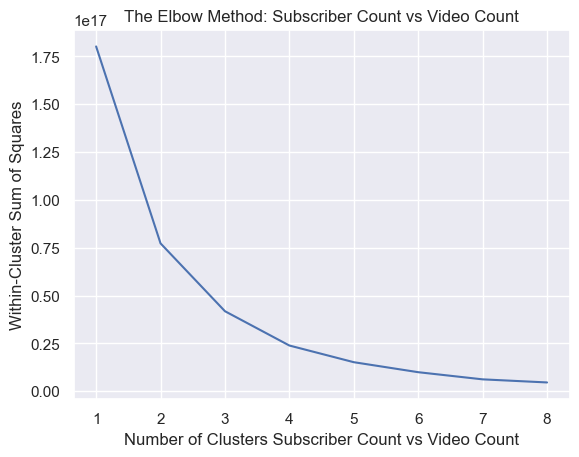

In [78]:
#The Elbow Method: Subscriber Count vs Video Count Graph

NumberClustersSubscriberCountVideoCount = range(1,9)
plt.plot(NumberClustersSubscriberCountVideoCount, wcssSubscriberCountVideoCount)
plt.title('The Elbow Method: Subscriber Count vs Video Count')
plt.xlabel('Number of Clusters Subscriber Count vs Video Count')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [79]:
#Clustering Subscriber Count vs. Video Count using 4 Clusters

xvarSubscriberCountVideoCount = ytclean[['Video_Count']]

kmeansSubscriberCountVideoCount = KMeans(4)
kmeansSubscriberCountVideoCount.fit(xvarSubscriberCountVideoCount)

KMeans(n_clusters=4)

In [80]:
#Clustering Subscriber Count vs Video Count Results

IdentifiedClustersSubscriberCountVideoCount = kmeansSubscriberCountVideoCount.fit_predict(xvarSubscriberCountVideoCount)
IdentifiedClustersSubscriberCountVideoCount

array([0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 3,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 2, 0, 1, 0, 0, 2, 0, 3], dtype=int32)

In [81]:
#Updating Subscriber Count and Video Count Table

SubscriberCountVideoCountWithClusters = SubscriberCountVideoCount.copy()
SubscriberCountVideoCountWithClusters['Cluster'] = IdentifiedClustersSubscriberCountVideoCount
SubscriberCountVideoCountWithClusters

,Video_Count,Subscriber_Count,Cluster
0,18831,237000000,0
1,861,154000000,0
2,105649,152000000,2
3,65028,77500000,2
4,1070,108000000,0
...,...,...,...
291,440,15000000,0
292,2789,11300000,0
293,76838,7580000,2
294,21617,9040000,0


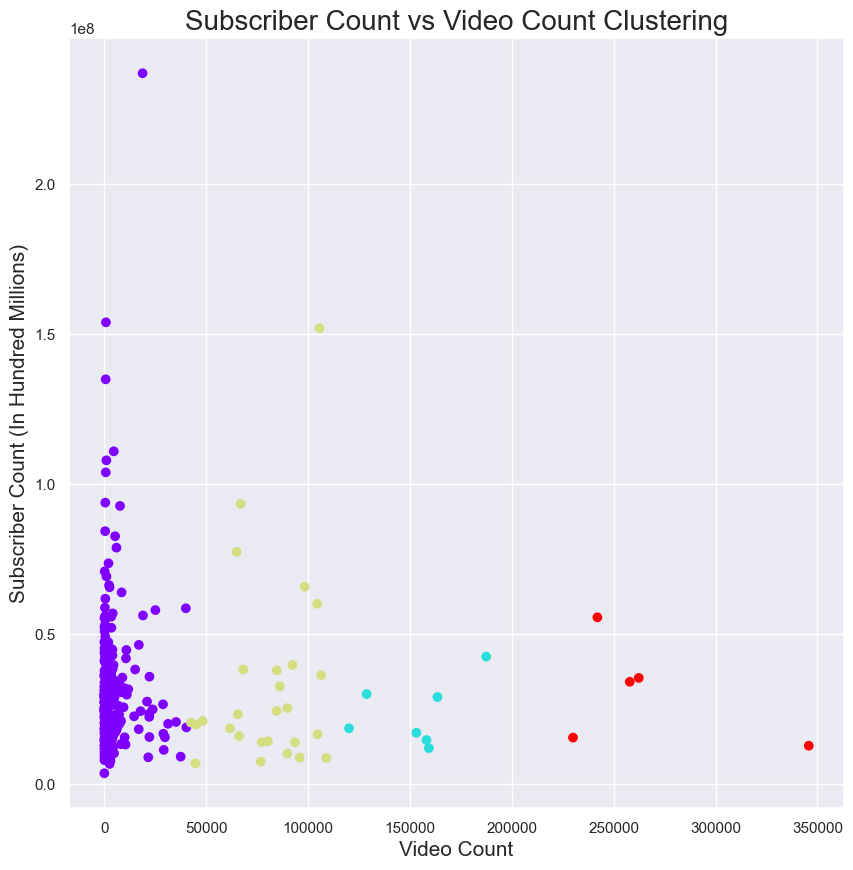

In [82]:
#Plotting the Subscriber Count vs Video Count Clustering Results

plt.figure(figsize = (10,10))
plt.scatter(SubscriberCountVideoCountWithClusters['Video_Count'], SubscriberCountVideoCountWithClusters['Subscriber_Count'], c = SubscriberCountVideoCountWithClusters['Cluster'], cmap='rainbow')
plt.title('Subscriber Count vs Video Count Clustering', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Based on the above scatterplot, there are 4 clusters within video counts: 0-48k, 49k-125k, 126-200k, and above 200k videos. For channels with videos 0-48k, there is much variance in subscriber count as shown on the scatterplot. As we move along the next three clusters from left to right, the variance noticeably drops. The second cluster (49k-125k videos) has a similar range in terms of subscriber count to the first cluster, approximately from 10 million to 160 million subscribers. The third and fourth clusters (125k-200k and 200k+ videos) mostly have less than 50 million subscribers. The average subscriber count seems to drop as the the video count of a channel increases. While this does not imply causation, it is defintitely an interesting correlation to note.

---

## 10) Linear Regression Analyses

In this section, we will explore simple linear relationships between Video Views vs Video Count, Video Views vs Subscriber Count, and Subscriber Count vs Video Count.

First, we will explore the linear relationship between video views and video count with a regression summary using the ordinary least squares method.

#### We will start with Video Views vs Video Count.

In [83]:
#Video Views vs Video Count Regression Summary

xvarVideoCount = sm.add_constant(VideoCount)
ResultsVideoViewsVideoCount = sm.OLS(VideoViews, xvarVideoCount).fit()
ResultsVideoViewsVideoCount.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Video_Views   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9441
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.332
Time:                        18:32:37   Log-Likelihood:                -7431.2
No. Observations:                 296   AIC:                         1.487e+04
Df Residuals:                     294   BIC:                         1.487e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.154e+10   1.22e+09     17.606      0.000    1.91e+10    2.39e+10
Video_Count  2.385e+04   2.46e+04      0.972      0.332   -2.45e+04    7.22e+04
==============================================================================
Omnibus:                      376.670   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26642.340
Skew:                           5.858   Prob(JB):                         0.00
Kurtosis:                      47.977   Cond. No.                     5.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared is 0.003, which implies no linear relationship between video views and video count. Also, the p-value for the coefficient of Video_Count is 0.332, which is much higher than a confidence level of 0.05.

#### Because the video count variable has a right-skew distribution, we can check to see if removing outliers provides any insight. To check if removing outliers will make a difference in the linear regression analysis for Video Views vs Video Count, we will create a table using only the 99% quantile of channels in terms of video count.

In [84]:
#Removing Video Count Outliers by using 99% Quantile

QVideoCount = ytclean['Video_Count'].quantile(0.99)
ytcleanQVideoCount = ytclean[ytclean['Video_Count'] < QVideoCount]
ytcleanQVideoCount.describe(include='all')

,Fixed_Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
count,293.000000,293,2.930000e+02,2.930000e+02,293.000000,293,293.000000
unique,NaN,293,NaN,NaN,NaN,11,NaN
top,NaN,T-Series,NaN,NaN,NaN,Music,NaN
freq,NaN,1,NaN,NaN,NaN,113,NaN
mean,147.426621,NaN,3.163311e+07,2.209083e+10,16415.201365,NaN,2011.399317
std,85.197467,NaN,2.481504e+07,1.950158e+10,37067.855897,NaN,3.997551
min,1.000000,NaN,3.720000e+06,1.144207e+10,15.000000,NaN,2005.000000
25%,74.000000,NaN,1.740000e+07,1.363154e+10,372.000000,NaN,2008.000000
50%,147.000000,NaN,2.570000e+07,1.650231e+10,1942.000000,NaN,2011.000000
75%,221.000000,NaN,3.690000e+07,2.290383e+10,8226.000000,NaN,2014.000000


In [85]:
#Video Views vs Video Count with Outliers Removed Regression Summary

xvarVideoCountQ = sm.add_constant(ytcleanQVideoCount['Video_Count'])
ResultsVideoViewsVideoCountQ = sm.OLS(ytcleanQVideoCount['Video_Views'], xvarVideoCountQ).fit()
ResultsVideoViewsVideoCountQ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Video_Views   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.376
Date:                Thu, 29 Jun 2023   Prob (F-statistic):             0.0672
Time:                        18:32:37   Log-Likelihood:                -7355.8
No. Observations:                 293   AIC:                         1.472e+04
Df Residuals:                     291   BIC:                         1.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.117e+10   1.24e+09     17.051      0.000    1.87e+10    2.36e+10
Video_Count  5.634e+04   3.07e+04      1.837      0.067   -4012.126    1.17e+05
==============================================================================
Omnibus:                      372.492   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26289.724
Skew:                           5.833   Prob(JB):                         0.00
Kurtosis:                      47.914   Cond. No.                     4.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the R-squared is still low at 0.011. The p-value for the Video_Count coefficient is 0.067, which is still greater than the confidence level of 0.05. We still cannot reject the null hypothesis that there is no relationship between video views and video count.

Below is a scatterplot of the Video Views vs Video Count using the 99% quantile of channels in terms of video count.

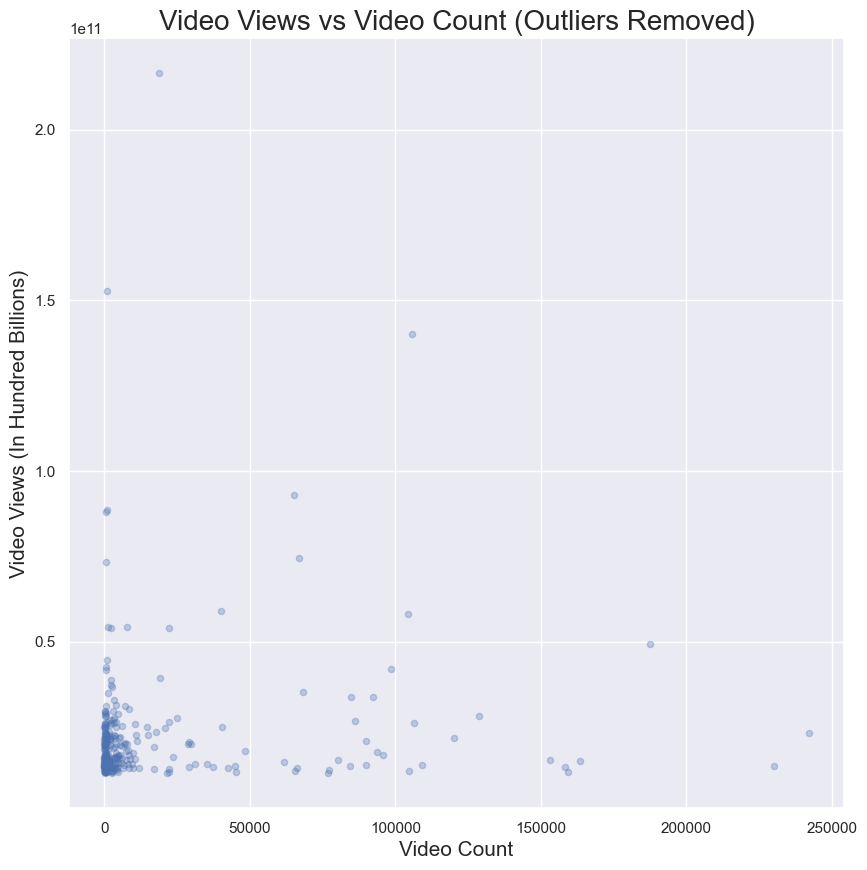

In [86]:
#Video Views vs Video Count Scatterplot with Outliers Removed

plt.figure(figsize = (10,10))
plt.scatter(ytcleanQVideoCount['Video_Count'], ytcleanQVideoCount['Video_Views'], s = 20, alpha = 0.3)
plt.title('Video Views vs Video Count (Outliers Removed)', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The same steps used in the first linear regression analysis will be taken for the next two analyses: Video Views vs Subscriber Count and Subscriber Count vs Video Count.

#### Next, we will analyze Video Views vs Subscriber Count.

In [87]:
#Video Views vs Subscriber Count Regression Summary

xvarSubscriberCount = sm.add_constant(SubscriberCount)
ResultsVideoViewsSubscriberCount = sm.OLS(VideoViews, xvarSubscriberCount).fit()
ResultsVideoViewsSubscriberCount.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Video_Views   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     613.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.97e-74
Time:                        18:32:37   Log-Likelihood:                -7264.8
No. Observations:                 296   AIC:                         1.453e+04
Df Residuals:                     294   BIC:                         1.454e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.578e+09   1.05e+09      1.509      0.132    -4.8e+08    3.64e+09
Subscriber_Count   646.3116     26.088     24.774      0.000     594.969     697.654
==============================================================================
Omnibus:                       67.835   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.225
Skew:                           0.222   Prob(JB):                    7.63e-288
Kurtosis:                      13.345   Cond. No.                     6.51e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we can see that the R-squared is 0.676, which is of note as it implies a linear relationship between video views and subscriber count. Also, the p-value for the Subscriber_Count coefficient is 0, which is less than the 0.05 confidence level. This means that we can reject the null hypothesis that the coefficient of Subscriber_Count is 0.

Below is a scatterplot of Video Views vs Subscriber Count with a regression line.

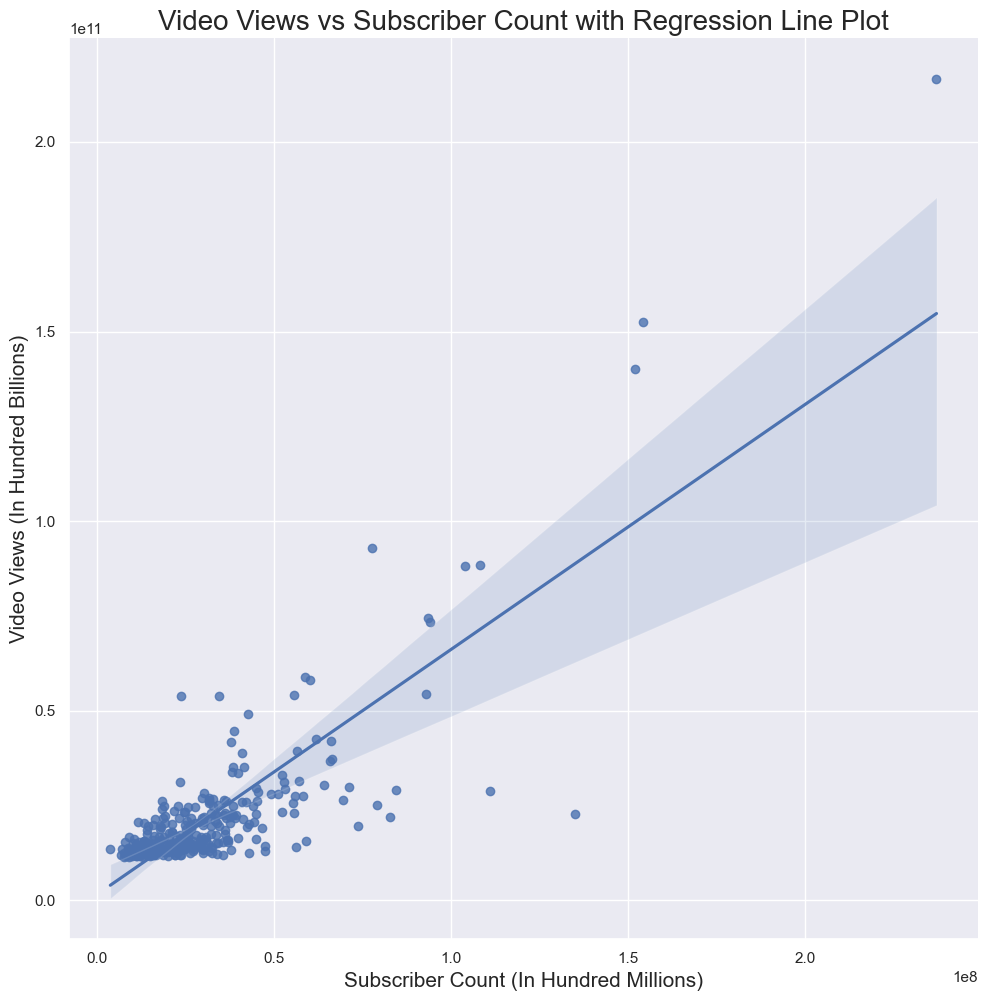

In [88]:
#Video Views vs Subscriber Count with Regression Line Plot

sns.lmplot(data = ytclean, x = 'Subscriber_Count', y = 'Video_Views',
                 fit_reg = True,
                 height = 10)
plt.title('Video Views vs Subscriber Count with Regression Line Plot', fontsize = 20)
plt.xlabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.ylabel('Video Views (In Hundred Billions)', fontsize = 15)
plt.xticks(rotation = 0)

plt.show()

#### Because the subscriber count variable has a right-skew distribution, we can check to see if removing outliers provides any insights. To check if removing outliers will make a difference in the linear regression analysis for Video Views vs Subscriber Count, we will create a table using only the 99% quantile of channels in terms of subscriber count.

In [89]:
#Removing Subscriber Count Outliers using 99% Quantile

QSubscriberCount = ytclean['Subscriber_Count'].quantile(0.99)
ytcleanQSubscriberCount = ytclean[ytclean['Subscriber_Count'] < QSubscriberCount]
ytcleanQSubscriberCount.describe(include='all')

,Fixed_Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
count,293.000000,293,2.930000e+02,2.930000e+02,293.000000,293,293.000000
unique,NaN,293,NaN,NaN,NaN,11,NaN
top,NaN,Sony SAB,NaN,NaN,NaN,Music,NaN
freq,NaN,1,NaN,NaN,NaN,112,NaN
mean,150.000000,NaN,3.006177e+07,2.048336e+10,18942.870307,NaN,2011.423208
std,84.726029,NaN,1.921590e+07,1.196339e+10,46018.369665,NaN,3.980914
min,4.000000,NaN,3.720000e+06,1.138766e+10,15.000000,NaN,2005.000000
25%,77.000000,NaN,1.730000e+07,1.354697e+10,372.000000,NaN,2008.000000
50%,150.000000,NaN,2.560000e+07,1.615914e+10,1970.000000,NaN,2011.000000
75%,223.000000,NaN,3.640000e+07,2.270896e+10,8257.000000,NaN,2014.000000


In [90]:
#Video Views vs Subscriber Count with Outliers Removed Regression Summary

xvarSubscriberCountQ = sm.add_constant(ytcleanQSubscriberCount['Subscriber_Count'])
ResultsVideoViewsSubscriberCountQ = sm.OLS(ytcleanQSubscriberCount['Video_Views'], xvarSubscriberCountQ).fit()
ResultsVideoViewsSubscriberCountQ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Video_Views   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     249.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.16e-41
Time:                        18:32:38   Log-Likelihood:                -7123.6
No. Observations:                 293   AIC:                         1.425e+04
Df Residuals:                     291   BIC:                         1.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.768e+09   9.55e+08      8.134      0.000    5.89e+09    9.65e+09
Subscriber_Count   422.9821     26.780     15.795      0.000     370.276     475.688
==============================================================================
Omnibus:                      123.892   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1105.985
Skew:                           1.469   Prob(JB):                    6.89e-241
Kurtosis:                      12.053   Cond. No.                     6.63e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the R-squared is reduced from 0.676 to 0.462. The explanatory power of the indepdent variable (subscriber count) is reduced when using the 99% quantile. However, the p-value of the Subscriber_Count coefficient is still 0, and thus we can reject the null hypothesis that the coefficient of Subscriber_Count is 0.

Below is a scatterplot of the Video Views vs Subscriber Count using the 99% quantile of channels in terms of subscriber count, with a regression line.

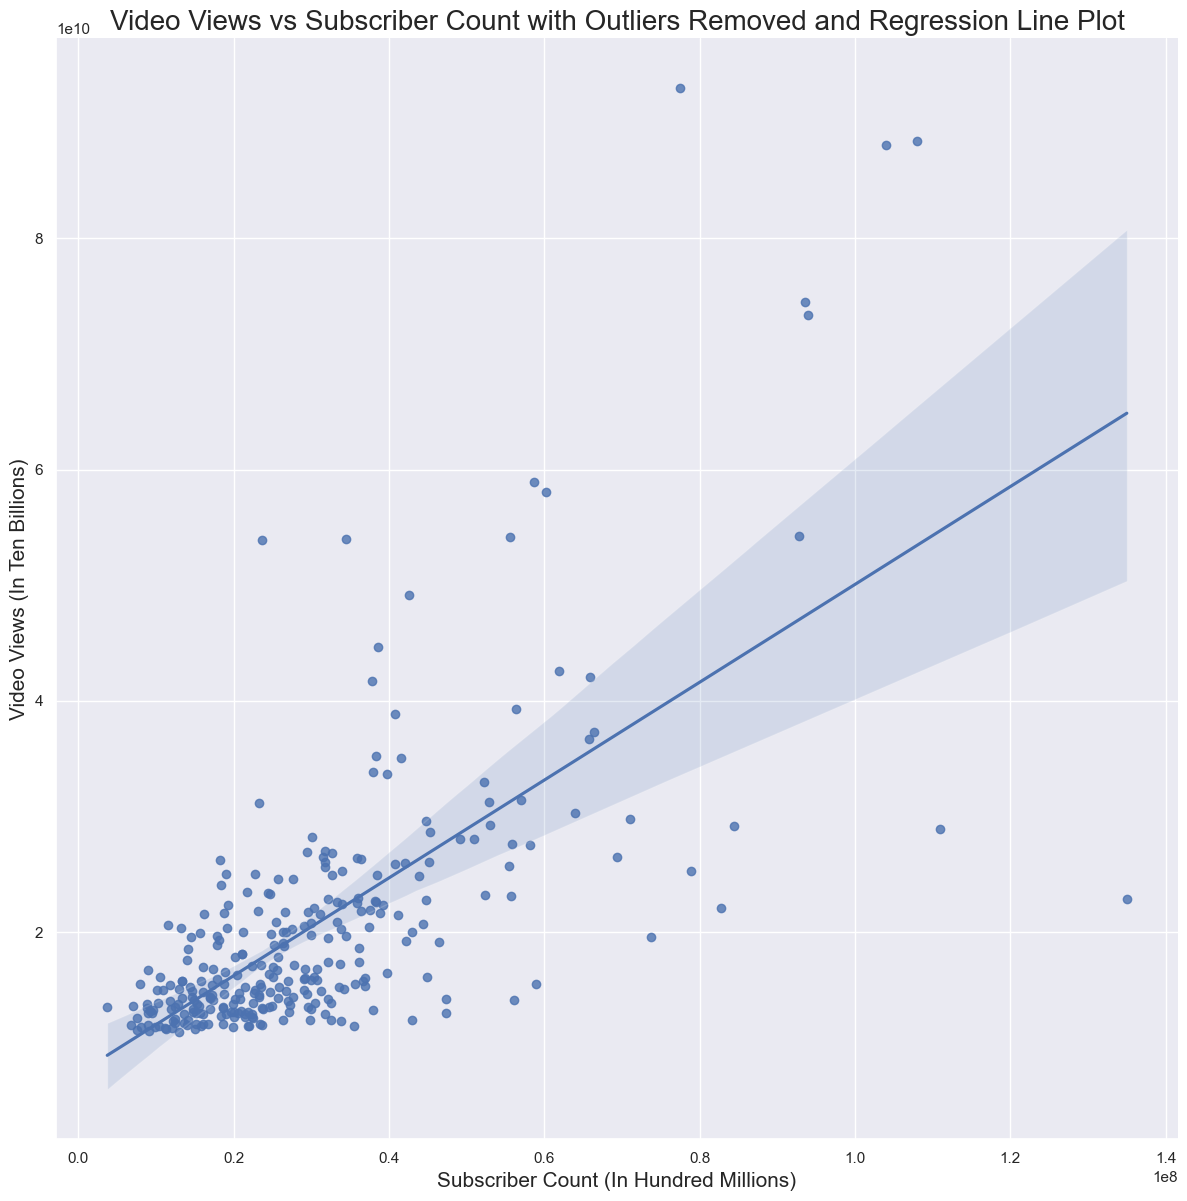

In [91]:
#Video Views vs Subscriber Count with Outliers Removed and Regression Line Plot

sns.lmplot(data = ytcleanQSubscriberCount, x = 'Subscriber_Count', y = 'Video_Views',
                 fit_reg = True,
                 height = 12)
plt.title('Video Views vs Subscriber Count with Outliers Removed and Regression Line Plot', fontsize = 20)
plt.xlabel('Subscriber Count (In Hundred Millions)', fontsize = 15)
plt.ylabel('Video Views (In Ten Billions)', fontsize = 15)
plt.xticks(rotation = 0)

plt.show()

#### Finally, we will analyze Subscriber Count vs Video Count.

In [92]:
#Subscriber Count vs Video Count Regression Summary

xvarVideoCount = sm.add_constant(VideoCount)
ResultsSubscriberCountVideoCount = sm.OLS(SubscriberCount, xvarVideoCount).fit()
ResultsSubscriberCountVideoCount.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Subscriber_Count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.005616
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.940
Time:                        18:32:38   Log-Likelihood:                -5458.3
No. Observations:                 296   AIC:                         1.092e+04
Df Residuals:                     294   BIC:                         1.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.164e+07   1.56e+06     20.294      0.000    2.86e+07    3.47e+07
Video_Count    -2.3445     31.284     -0.075      0.940     -63.914      59.224
==============================================================================
Omnibus:                      261.319   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5603.272
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      23.079   Cond. No.                     5.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared is 0.000, which implies no linear relationship between video views and subscriber count. Also, the p-value for the coefficient of Video_Count is 0.940, which is much higher than a confidence level of 0.05.

#### Because the video count variable has a right-skew distribution, we can check to see if removing outliers provides any insights. To check if removing outliers will make a difference in the linear regression analysis for Subscriber Count vs Video Count, we will create a table using only the 99% quantile of channels in terms of video count.

In [93]:
#Removing Video Count Outliers using 99% Quantile

QVideoCount = ytclean['Video_Count'].quantile(0.99)
ytcleanQVideoCount = ytclean[ytclean['Video_Count'] < QVideoCount]
ytcleanQVideoCount.describe(include='all')

,Fixed_Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
count,293.000000,293,2.930000e+02,2.930000e+02,293.000000,293,293.000000
unique,NaN,293,NaN,NaN,NaN,11,NaN
top,NaN,T-Series,NaN,NaN,NaN,Music,NaN
freq,NaN,1,NaN,NaN,NaN,113,NaN
mean,147.426621,NaN,3.163311e+07,2.209083e+10,16415.201365,NaN,2011.399317
std,85.197467,NaN,2.481504e+07,1.950158e+10,37067.855897,NaN,3.997551
min,1.000000,NaN,3.720000e+06,1.144207e+10,15.000000,NaN,2005.000000
25%,74.000000,NaN,1.740000e+07,1.363154e+10,372.000000,NaN,2008.000000
50%,147.000000,NaN,2.570000e+07,1.650231e+10,1942.000000,NaN,2011.000000
75%,221.000000,NaN,3.690000e+07,2.290383e+10,8226.000000,NaN,2014.000000


In [94]:
#Subscriber Count vs Video Count with Outliers Removed Regression Summary

xvarVideoCountQ = sm.add_constant(ytcleanQVideoCount['Video_Count'])
ResultsSubscriberCountVideoCountQ = sm.OLS(ytcleanQVideoCount['Subscriber_Count'], xvarVideoCountQ).fit()
ResultsSubscriberCountVideoCountQ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Subscriber_Count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.03868
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.844
Time:                        18:32:38   Log-Likelihood:                -5404.1
No. Observations:                 293   AIC:                         1.081e+04
Df Residuals:                     291   BIC:                         1.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.151e+07   1.59e+06     19.833      0.000    2.84e+07    3.46e+07
Video_Count     7.7175     39.241      0.197      0.844     -69.515      84.950
==============================================================================
Omnibus:                      257.904   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5444.381
Skew:                           3.560   Prob(JB):                         0.00
Kurtosis:                      22.882   Cond. No.                     4.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After using the 99% quantile, the R-squared is still 0. Also, the p-value of the Video_Count coefficient is 0.844, much higher than the confidence level 0.05. This means that we cannot reject the null hypothesis that the coefficient of Video_Count is 0.

Below is a scatterplot of the Subscriber Count vs Video Count using the 99% quantile of channels in terms of video count.

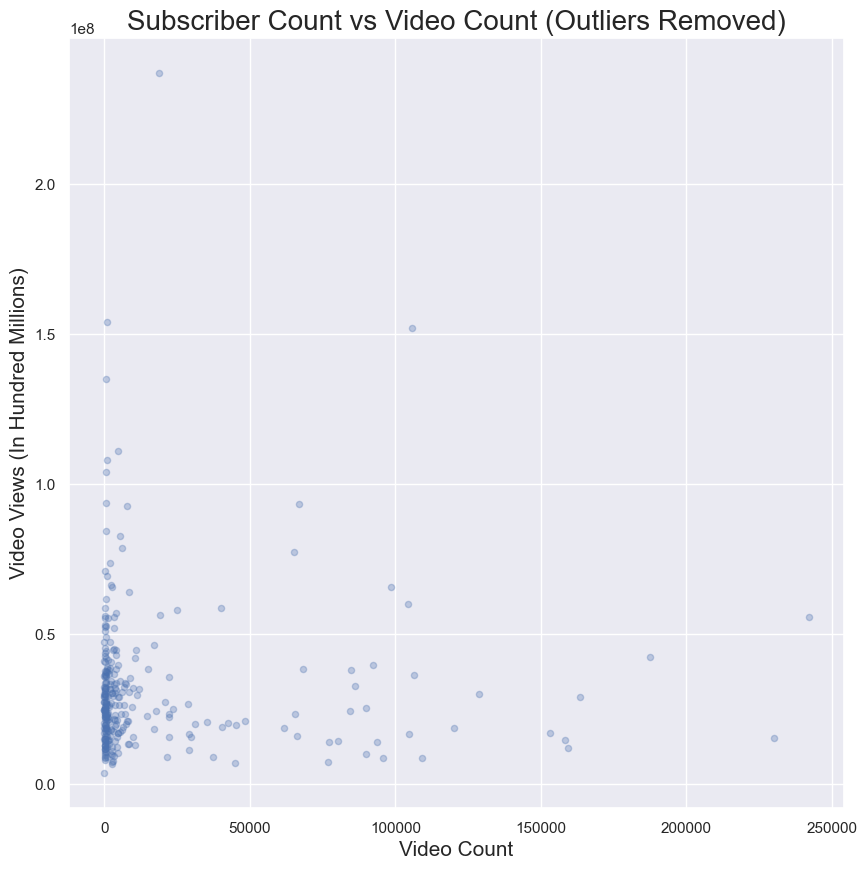

In [95]:
#Subscriber Count vs Video Count Scatterplot with Outliers Removed

plt.figure(figsize = (10,10))
plt.scatter(ytcleanQVideoCount['Video_Count'], ytcleanQVideoCount['Subscriber_Count'], s = 20, alpha = 0.3)
plt.title('Subscriber Count vs Video Count (Outliers Removed)', fontsize = 20)
plt.xlabel('Video Count', fontsize = 15)
plt.ylabel('Video Views (In Hundred Millions)', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

---

## 11) Conclusion

Based on the analyses performed in this project, below are the key takeaways:
<br>
<br>
- Of the genres, channels categorized as Music, Entertainment, and People & Blogs are the top 3 in terms of channel count.
<br>
<br>
- In terms of channel metrics, below are the top 3 genres for each category:
  - Total Video Views: Music, Entertainment, Film & Animation
  - Total Video Count: Entertainment, News & Politics, People & Blogs
  - Total Subscriber Count: Music, Entertainment, Film & Animation
<br>
<br>
- Music and Entertainment are within the top 3 of genres in terms of video views, but they are also within the top 3 in terms of channel count and subscriber count. Film & Animation is also in the top 3 of video views and comes in 4th in terms of channel count and 3rd in terms of subscriber count.
<br>
<br>
- Of the years the channels were started, 2006, 2012, and 2014 were the top 3 in terms channel count (with 2009 being a close 4th). On the surface this makes sense since channels created during these years have been on the platform for a longer time, but there could be other factors as to why channels created during these years specifically have had huge success.
<br>
<br>
- In terms of channel metrics, below are the top 3 years (channel started) for each category:
    - Total Video Views: 2006, 2014, 2012
    - Total Video Count: 2006, 2007, 2014
    - Total Subscriber Count: 2006, 2014, 2012
<br>
<br>
- 2006, 2014, and 2012 (in that order) are the top 3 years with the most video views. They are also top 3 in terms of channel count and subscriber count.
<br>
<br>
- Based on the clustering analyses, video views tend to decrease along each increasing cluster of video count (1-50k, 51-180k, 180k+) per channel. Such correlation is of note, but implies no causation as supported by the simple regression analysis. The R-squared is 0.003 (0.011 using the 99% quantile of video count).
<br>
<br>
- On the other hand, video views tend to increase along each increasing cluster of subscriber count (3-40 million, 41-90 million, 90 million +) per channel. This trend seems to have merit based on the simple regression analysis. The R-squared is 0.676 (0.462 using the 99% quantile of subscriber count) and a p-value of 0 for the subscriber count coefficient allows us to reject then null hypothesis that its coefficient is 0.
<br>
<br>
- Subscriber count tends to decrease along each increasing cluster of video count (0-50k, 51-125k, 126-200k, 200k+) per channel. Such correlation is of note, but implies no causation as supported by the simple regression analysis. The R-squared is 0.000 (also 0.000 using the 99% quantile of video count).
<br>
<br>
- Conclusively from the points above, a channel's video views seems to be positively correlated with its subscriber count, while its video count does not seem to affect the video views. Genres within Music, Entertainment, Film & Animation, and People & Blogs have the most success in terms of total video views. Channels started in 2006, 2014, and 2012 have had the most success, but more data is needed to explain why. Other types of data that can improve the dataset and provide further insights include a channel's country, subscriber vs non-subscriber view count/demographics, average video length, average watch time/view duration, average percentage videos viewed, re-watches/views per unique viewer, audience retention, engagement (likes, comments, shares), and tags. YouTube's recommendation algorithm would also be taken into consideration when it comes to insights not readily explained by data.